In [1]:
import numpy as np
import pickle
!pip install bcolz
import bcolz

You should consider upgrading via the '/home/varunc/env/bin/python3.7 -m pip install --upgrade pip' command.


In [46]:
from collections import Counter

In [47]:
from functools import reduce

In [4]:
from tqdm.notebook import tqdm
import string
import nltk

In [5]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/varunc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/varunc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/varunc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import torch
import urllib
import glob
import os
import numpy as np
import pandas as pd
import torch.nn as nn
import nltk
from PIL import Image
from torchvision import transforms
import torchvision
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet

In [7]:
import os
import torch
from PIL import Image
import pandas as pd
import spacy
from torch import nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
spacy_eng = spacy.load("en_core_web_sm")

In [8]:
def read_img(file):
    img_id=[]
    for img in glob.glob(file+'*.jpg'):
        temp=os.path.basename(img)
        img_id.append(temp)
        
    return img_id

In [9]:
flickr_path = '/scratch/varunc/flickr/'

In [10]:
flickr_tar = flickr_path+'Flickr-8K.tar'

In [11]:
! tar -C $flickr_path -xvf $flickr_tar

./Flickr-8K/
./Flickr-8K/Flicker8k_Dataset/
./Flickr-8K/Flicker8k_Dataset/3089107423_81a24eaf18.jpg
./Flickr-8K/Flicker8k_Dataset/2046778775_0dd7cac6ab.jpg
./Flickr-8K/Flicker8k_Dataset/493542985_c85ad29ebe.jpg
./Flickr-8K/Flicker8k_Dataset/381275595_b429fd1639.jpg
./Flickr-8K/Flicker8k_Dataset/239807547_4923efc821.jpg
./Flickr-8K/Flicker8k_Dataset/2249480913_e1695e5c28.jpg
./Flickr-8K/Flicker8k_Dataset/2330536645_2d36b516e1.jpg
./Flickr-8K/Flicker8k_Dataset/2681215810_00b0642f7b.jpg
./Flickr-8K/Flicker8k_Dataset/1384292980_4022a7520c.jpg
./Flickr-8K/Flicker8k_Dataset/2328104318_5a43ca170c.jpg
./Flickr-8K/Flicker8k_Dataset/480607352_65614ab348.jpg
./Flickr-8K/Flicker8k_Dataset/3265578645_4044a7049a.jpg
./Flickr-8K/Flicker8k_Dataset/1312954382_cf6d70d63a.jpg
./Flickr-8K/Flicker8k_Dataset/2800990525_a1f8427272.jpg
./Flickr-8K/Flicker8k_Dataset/3189293145_35dea42679.jpg
./Flickr-8K/Flicker8k_Dataset/3520922312_e58a6cfd9c.jpg
./Flickr-8K/Flicker8k_Dataset/3170802797_3c851bb475.jpg
./Flickr

./Flickr-8K/Flicker8k_Dataset/3549673305_4dfd44e04a.jpg
./Flickr-8K/Flicker8k_Dataset/1211015912_9f3ee3a995.jpg
./Flickr-8K/Flicker8k_Dataset/233270519_d60d4518fa.jpg
./Flickr-8K/Flicker8k_Dataset/3584196366_a4b43d6644.jpg
./Flickr-8K/Flicker8k_Dataset/3561314880_ea9a7e245f.jpg
./Flickr-8K/Flicker8k_Dataset/3322389758_394c990b6a.jpg
./Flickr-8K/Flicker8k_Dataset/820169182_f5e78d7d19.jpg
./Flickr-8K/Flicker8k_Dataset/1918573100_d31cbb6b77.jpg
./Flickr-8K/Flicker8k_Dataset/2381102729_12fc4d4c76.jpg
./Flickr-8K/Flicker8k_Dataset/3494723363_eaa6bc563b.jpg
./Flickr-8K/Flicker8k_Dataset/3427023324_f1f6504bf4.jpg
./Flickr-8K/Flicker8k_Dataset/3640422448_a0f42e4559.jpg
./Flickr-8K/Flicker8k_Dataset/3084731832_8e518e320d.jpg
./Flickr-8K/Flicker8k_Dataset/3333675897_0043f992d3.jpg
./Flickr-8K/Flicker8k_Dataset/3205754736_32c29b5208.jpg
./Flickr-8K/Flicker8k_Dataset/3197981073_3156963446.jpg
./Flickr-8K/Flicker8k_Dataset/2766630484_ce73f47031.jpg
./Flickr-8K/Flicker8k_Dataset/2325816912_b3bb41cdb

./Flickr-8K/Flicker8k_Dataset/2980445969_a86f4e6a0e.jpg
./Flickr-8K/Flicker8k_Dataset/2497420371_74788d7ba1.jpg
./Flickr-8K/Flicker8k_Dataset/933118213_b35b0b62a7.jpg
./Flickr-8K/Flicker8k_Dataset/3363836972_c87b58c948.jpg
./Flickr-8K/Flicker8k_Dataset/247617035_9f2e821534.jpg
./Flickr-8K/Flicker8k_Dataset/3615730936_23457575e9.jpg
./Flickr-8K/Flicker8k_Dataset/2436398074_8737f40869.jpg
./Flickr-8K/Flicker8k_Dataset/1420060118_aed262d606.jpg
./Flickr-8K/Flicker8k_Dataset/3177468217_56a9142e46.jpg
./Flickr-8K/Flicker8k_Dataset/2823575468_15f6c345fc.jpg
./Flickr-8K/Flicker8k_Dataset/3495349745_1b29a63571.jpg
./Flickr-8K/Flicker8k_Dataset/2450486758_a66fd296ea.jpg
./Flickr-8K/Flicker8k_Dataset/2053733930_e245615ad4.jpg
./Flickr-8K/Flicker8k_Dataset/2745663684_650f84e1e6.jpg
./Flickr-8K/Flicker8k_Dataset/254475194_3d8f4dfd53.jpg
./Flickr-8K/Flicker8k_Dataset/2630507245_bea4804288.jpg
./Flickr-8K/Flicker8k_Dataset/3436063693_15c8d377a2.jpg
./Flickr-8K/Flicker8k_Dataset/3319899418_4bcf1b00d8

./Flickr-8K/Flicker8k_Dataset/3127142756_bf0bfcb571.jpg
./Flickr-8K/Flicker8k_Dataset/2085400856_ae09df33a7.jpg
./Flickr-8K/Flicker8k_Dataset/119534510_d52b3781a3.jpg
./Flickr-8K/Flicker8k_Dataset/3582914739_bef2828a06.jpg
./Flickr-8K/Flicker8k_Dataset/3408130183_f038bdaa4f.jpg
./Flickr-8K/Flicker8k_Dataset/576920249_df1bdc2068.jpg
./Flickr-8K/Flicker8k_Dataset/2944025729_5aecda30ee.jpg
./Flickr-8K/Flicker8k_Dataset/2582390123_71120edb0c.jpg
./Flickr-8K/Flicker8k_Dataset/1439046601_cf110a75a7.jpg
./Flickr-8K/Flicker8k_Dataset/3713922357_e0a013fb97.jpg
./Flickr-8K/Flicker8k_Dataset/3549614763_42f34f3d1e.jpg
./Flickr-8K/Flicker8k_Dataset/3220161734_77f42734b9.jpg
./Flickr-8K/Flicker8k_Dataset/3062273350_fd66106f21.jpg
./Flickr-8K/Flicker8k_Dataset/2443229844_277cded27d.jpg
./Flickr-8K/Flicker8k_Dataset/405537503_f66ecc5073.jpg
./Flickr-8K/Flicker8k_Dataset/3421706363_a3e22a4908.jpg
./Flickr-8K/Flicker8k_Dataset/3127888173_9a9a8ac3bd.jpg
./Flickr-8K/Flicker8k_Dataset/2393971707_bce01ae754

./Flickr-8K/Flicker8k_Dataset/343662720_39e4067cd1.jpg
./Flickr-8K/Flicker8k_Dataset/403678611_73978faed7.jpg
./Flickr-8K/Flicker8k_Dataset/464251704_b0f0c4c87a.jpg
./Flickr-8K/Flicker8k_Dataset/3340857141_85d97a7466.jpg
./Flickr-8K/Flicker8k_Dataset/3386893620_5f0bb4e794.jpg
./Flickr-8K/Flicker8k_Dataset/2666205903_8d287669e1.jpg
./Flickr-8K/Flicker8k_Dataset/2148916767_644ea6a7fa.jpg
./Flickr-8K/Flicker8k_Dataset/473220329_819a913bbb.jpg
./Flickr-8K/Flicker8k_Dataset/464527562_a18f095225.jpg
./Flickr-8K/Flicker8k_Dataset/397547349_1fd14b95af.jpg
./Flickr-8K/Flicker8k_Dataset/3385593926_d3e9c21170.jpg
./Flickr-8K/Flicker8k_Dataset/3360930596_1e75164ce6.jpg
./Flickr-8K/Flicker8k_Dataset/3278189732_f750cb26b7.jpg
./Flickr-8K/Flicker8k_Dataset/166321294_4a5e68535f.jpg
./Flickr-8K/Flicker8k_Dataset/3102204862_f1d220230b.jpg
./Flickr-8K/Flicker8k_Dataset/2561751298_320eef38ec.jpg
./Flickr-8K/Flicker8k_Dataset/3111482098_11c0f4f309.jpg
./Flickr-8K/Flicker8k_Dataset/2050067751_22d2763fd2.jpg

./Flickr-8K/Flicker8k_Dataset/387830531_e89c192b92.jpg
./Flickr-8K/Flicker8k_Dataset/3557148230_7fc843e5de.jpg
./Flickr-8K/Flicker8k_Dataset/3626689571_5817f99c0e.jpg
./Flickr-8K/Flicker8k_Dataset/518610439_b64ab21c02.jpg
./Flickr-8K/Flicker8k_Dataset/3590557969_d0270d518b.jpg
./Flickr-8K/Flicker8k_Dataset/2271755053_e1b1ec8442.jpg
./Flickr-8K/Flicker8k_Dataset/1511807116_41c3645e8c.jpg
./Flickr-8K/Flicker8k_Dataset/3733074526_82aa8d5f8d.jpg
./Flickr-8K/Flicker8k_Dataset/2968216482_ede65b20a8.jpg
./Flickr-8K/Flicker8k_Dataset/78984436_ad96eaa802.jpg
./Flickr-8K/Flicker8k_Dataset/3653462288_bfe2360a64.jpg
./Flickr-8K/Flicker8k_Dataset/1417637704_572b4d6557.jpg
./Flickr-8K/Flicker8k_Dataset/1389323170_d1c81d6b51.jpg
./Flickr-8K/Flicker8k_Dataset/2410562803_56ec09f41c.jpg
./Flickr-8K/Flicker8k_Dataset/3216901052_269ace7b3c.jpg
./Flickr-8K/Flicker8k_Dataset/3649387275_75295baa28.jpg
./Flickr-8K/Flicker8k_Dataset/788126442_086334f0cf.jpg
./Flickr-8K/Flicker8k_Dataset/2732625904_4fbb653434.j

./Flickr-8K/Flicker8k_Dataset/3467941308_ae6989e29c.jpg
./Flickr-8K/Flicker8k_Dataset/1818403842_553a2a392c.jpg
./Flickr-8K/Flicker8k_Dataset/3148193539_de9dd48fc8.jpg
./Flickr-8K/Flicker8k_Dataset/3721799573_2f470950e0.jpg
./Flickr-8K/Flicker8k_Dataset/2738077433_10e6264b6f.jpg
./Flickr-8K/Flicker8k_Dataset/401476986_73918145a3.jpg
./Flickr-8K/Flicker8k_Dataset/3485486737_953f9d3be2.jpg
./Flickr-8K/Flicker8k_Dataset/2688102742_885e578a3f.jpg
./Flickr-8K/Flicker8k_Dataset/3123770450_cedc16d162.jpg
./Flickr-8K/Flicker8k_Dataset/2384728877_48c85d58af.jpg
./Flickr-8K/Flicker8k_Dataset/2280354512_c0d035d53f.jpg
./Flickr-8K/Flicker8k_Dataset/300148649_72f7f0399c.jpg
./Flickr-8K/Flicker8k_Dataset/3455405300_aa3069ecaa.jpg
./Flickr-8K/Flicker8k_Dataset/3503544012_1771be9d3a.jpg
./Flickr-8K/Flicker8k_Dataset/3608849440_e7d2bed29f.jpg
./Flickr-8K/Flicker8k_Dataset/2372763106_ddea79d36e.jpg
./Flickr-8K/Flicker8k_Dataset/1801063894_60bce29e19.jpg
./Flickr-8K/Flicker8k_Dataset/288025239_5e59ba9c3b

./Flickr-8K/Flicker8k_Dataset/2279980395_989d48ae72.jpg
./Flickr-8K/Flicker8k_Dataset/2565657591_6c1cdfc092.jpg
./Flickr-8K/Flicker8k_Dataset/3449170348_34dac4a380.jpg
./Flickr-8K/Flicker8k_Dataset/3179952488_c1c812a03b.jpg
./Flickr-8K/Flicker8k_Dataset/3107059919_0594269f72.jpg
./Flickr-8K/Flicker8k_Dataset/2745811124_12c4426b8b.jpg
./Flickr-8K/Flicker8k_Dataset/393987665_91d28f0ed0.jpg
./Flickr-8K/Flicker8k_Dataset/96973080_783e375945.jpg
./Flickr-8K/Flicker8k_Dataset/537559285_29be110134.jpg
./Flickr-8K/Flicker8k_Dataset/3017203816_5dc2a6b392.jpg
./Flickr-8K/Flicker8k_Dataset/2930580341_d36eec8e3c.jpg
./Flickr-8K/Flicker8k_Dataset/1247181182_35cabd76f3.jpg
./Flickr-8K/Flicker8k_Dataset/3470129475_9e58b6742c.jpg
./Flickr-8K/Flicker8k_Dataset/2594336381_a93772823b.jpg
./Flickr-8K/Flicker8k_Dataset/269361490_a22ae818bf.jpg
./Flickr-8K/Flicker8k_Dataset/2447289477_e888df561d.jpg
./Flickr-8K/Flicker8k_Dataset/3159424456_f316bdc1d5.jpg
./Flickr-8K/Flicker8k_Dataset/2081615901_13092cac56.j

./Flickr-8K/Flicker8k_Dataset/2934121315_4969eeda1b.jpg
./Flickr-8K/Flicker8k_Dataset/2862676319_a9dab1309f.jpg
./Flickr-8K/Flicker8k_Dataset/3326024473_4c16e4fbfc.jpg
./Flickr-8K/Flicker8k_Dataset/2587106431_1cc0e719c6.jpg
./Flickr-8K/Flicker8k_Dataset/2774554310_007e980a90.jpg
./Flickr-8K/Flicker8k_Dataset/513269597_c38308feaf.jpg
./Flickr-8K/Flicker8k_Dataset/2882589788_cb0b407a8d.jpg
./Flickr-8K/Flicker8k_Dataset/2114126343_a0f74ff63b.jpg
./Flickr-8K/Flicker8k_Dataset/3367758711_a8c09607ac.jpg
./Flickr-8K/Flicker8k_Dataset/2587818583_4aa8e7b174.jpg
./Flickr-8K/Flicker8k_Dataset/241346215_037e18403a.jpg
./Flickr-8K/Flicker8k_Dataset/3292016893_24d14c8b4f.jpg
./Flickr-8K/Flicker8k_Dataset/250892549_1e06a06a78.jpg
./Flickr-8K/Flicker8k_Dataset/2629445284_83390e83af.jpg
./Flickr-8K/Flicker8k_Dataset/3224560800_8fefd52510.jpg
./Flickr-8K/Flicker8k_Dataset/362316425_bda238b4de.jpg
./Flickr-8K/Flicker8k_Dataset/1805990081_da9cefe3a5.jpg
./Flickr-8K/Flicker8k_Dataset/3525403875_7f95e0cbfe.

./Flickr-8K/Flicker8k_Dataset/3541474181_489f19fae7.jpg
./Flickr-8K/Flicker8k_Dataset/2887798667_ce761d45e8.jpg
./Flickr-8K/Flicker8k_Dataset/3696698390_989f1488e7.jpg
./Flickr-8K/Flicker8k_Dataset/3411393875_a9ff73c67a.jpg
./Flickr-8K/Flicker8k_Dataset/3193335577_9bdbaf9f70.jpg
./Flickr-8K/Flicker8k_Dataset/2664102751_d5a737a566.jpg
./Flickr-8K/Flicker8k_Dataset/2603125422_659391f961.jpg
./Flickr-8K/Flicker8k_Dataset/349889354_4b2889a9bd.jpg
./Flickr-8K/Flicker8k_Dataset/3091921457_83eee69591.jpg
./Flickr-8K/Flicker8k_Dataset/2431723485_bc6b8e6418.jpg
./Flickr-8K/Flicker8k_Dataset/3669564923_8fcb1a6eff.jpg
./Flickr-8K/Flicker8k_Dataset/2157173498_2eea42ee38.jpg
./Flickr-8K/Flicker8k_Dataset/3606942887_1159d92548.jpg
./Flickr-8K/Flicker8k_Dataset/483841513_e660391880.jpg
./Flickr-8K/Flicker8k_Dataset/3196100539_102fe877b3.jpg
./Flickr-8K/Flicker8k_Dataset/1402859872_0fc8cf8108.jpg
./Flickr-8K/Flicker8k_Dataset/3197891333_b1b0fd1702.jpg
./Flickr-8K/Flicker8k_Dataset/836768303_d748df5546

./Flickr-8K/Flicker8k_Dataset/3363750526_efcedc47a9.jpg
./Flickr-8K/Flicker8k_Dataset/3231237864_8cb1c6d863.jpg
./Flickr-8K/Flicker8k_Dataset/3618115051_41b5a7706c.jpg
./Flickr-8K/Flicker8k_Dataset/2929669711_b2d5a640f0.jpg
./Flickr-8K/Flicker8k_Dataset/195962790_3380aea352.jpg
./Flickr-8K/Flicker8k_Dataset/3599568766_9e96def0ef.jpg
./Flickr-8K/Flicker8k_Dataset/3446191973_1db572ed8a.jpg
./Flickr-8K/Flicker8k_Dataset/823675317_b5fbdb17b3.jpg
./Flickr-8K/Flicker8k_Dataset/3371887001_44ab0c2f17.jpg
./Flickr-8K/Flicker8k_Dataset/3601491447_a338875b51.jpg
./Flickr-8K/Flicker8k_Dataset/1713248047_d03721456d.jpg
./Flickr-8K/Flicker8k_Dataset/3707283973_5cdaa39340.jpg
./Flickr-8K/Flicker8k_Dataset/2680990587_eee6bd04fb.jpg
./Flickr-8K/Flicker8k_Dataset/3353036763_4cbeba03b2.jpg
./Flickr-8K/Flicker8k_Dataset/3084011028_d1e2c40d7d.jpg
./Flickr-8K/Flicker8k_Dataset/2173061319_1f267765dc.jpg
./Flickr-8K/Flicker8k_Dataset/3607405494_0df89110a6.jpg
./Flickr-8K/Flicker8k_Dataset/2482629385_f370b290d

./Flickr-8K/Flicker8k_Dataset/2543589122_ec3e55f434.jpg
./Flickr-8K/Flicker8k_Dataset/1119015538_e8e796281e.jpg
./Flickr-8K/Flicker8k_Dataset/2070798293_6b9405e04d.jpg
./Flickr-8K/Flicker8k_Dataset/424779662_568f9606d0.jpg
./Flickr-8K/Flicker8k_Dataset/3245939062_8ffe1d2be5.jpg
./Flickr-8K/Flicker8k_Dataset/3478591390_b526580644.jpg
./Flickr-8K/Flicker8k_Dataset/2603792708_18a97bac97.jpg
./Flickr-8K/Flicker8k_Dataset/3732728142_86364a706e.jpg
./Flickr-8K/Flicker8k_Dataset/3486135177_772628d034.jpg
./Flickr-8K/Flicker8k_Dataset/3482062809_3b694322c4.jpg
./Flickr-8K/Flicker8k_Dataset/421316045_ae7a1eb4bc.jpg
./Flickr-8K/Flicker8k_Dataset/3052038928_9f53aa2084.jpg
./Flickr-8K/Flicker8k_Dataset/2575647360_f5de38c751.jpg
./Flickr-8K/Flicker8k_Dataset/3450776690_38605c667d.jpg
./Flickr-8K/Flicker8k_Dataset/2370481277_a3085614c9.jpg
./Flickr-8K/Flicker8k_Dataset/469029994_349e138606.jpg
./Flickr-8K/Flicker8k_Dataset/397286183_745abbf40d.jpg
./Flickr-8K/Flicker8k_Dataset/3461677493_5bfb73038e.

./Flickr-8K/Flicker8k_Dataset/414773731_c3f5bf43d5.jpg
./Flickr-8K/Flicker8k_Dataset/3613264553_97b687f172.jpg
./Flickr-8K/Flicker8k_Dataset/3694064560_467683205b.jpg
./Flickr-8K/Flicker8k_Dataset/2922512807_d382528a93.jpg
./Flickr-8K/Flicker8k_Dataset/1248953128_24c9f8d924.jpg
./Flickr-8K/Flicker8k_Dataset/3005126574_49c28ffbee.jpg
./Flickr-8K/Flicker8k_Dataset/774009278_8e75b7d498.jpg
./Flickr-8K/Flicker8k_Dataset/458213442_12c59e61a0.jpg
./Flickr-8K/Flicker8k_Dataset/2737233999_34d60dc5c3.jpg
./Flickr-8K/Flicker8k_Dataset/263850317_5bb3a18a08.jpg
./Flickr-8K/Flicker8k_Dataset/2847615962_c330bded6e.jpg
./Flickr-8K/Flicker8k_Dataset/3133825703_359a0c414d.jpg
./Flickr-8K/Flicker8k_Dataset/3564148252_aa4cb36a32.jpg
./Flickr-8K/Flicker8k_Dataset/2687328779_b4356dab16.jpg
./Flickr-8K/Flicker8k_Dataset/418796494_bdb441de42.jpg
./Flickr-8K/Flicker8k_Dataset/3666188047_e81e1d97a7.jpg
./Flickr-8K/Flicker8k_Dataset/2381613738_d8d2012e3c.jpg
./Flickr-8K/Flicker8k_Dataset/3349309109_4024a09a17.j

./Flickr-8K/Flicker8k_Dataset/3673484638_dce87295fe.jpg
./Flickr-8K/Flicker8k_Dataset/3222496967_45d468ee66.jpg
./Flickr-8K/Flicker8k_Dataset/2596475173_58f11fc583.jpg
./Flickr-8K/Flicker8k_Dataset/287999021_998c2eeb91.jpg
./Flickr-8K/Flicker8k_Dataset/1718184338_5968d88edb.jpg
./Flickr-8K/Flicker8k_Dataset/1159574340_99ba8c3c59.jpg
./Flickr-8K/Flicker8k_Dataset/566921157_07c18a41e2.jpg
./Flickr-8K/Flicker8k_Dataset/3649307685_60c1294d2a.jpg
./Flickr-8K/Flicker8k_Dataset/3535304540_0247e8cf8c.jpg
./Flickr-8K/Flicker8k_Dataset/3518334317_bc40bae18d.jpg
./Flickr-8K/Flicker8k_Dataset/236474697_0c73dd5d8b.jpg
./Flickr-8K/Flicker8k_Dataset/261490838_2f3ac98b12.jpg
./Flickr-8K/Flicker8k_Dataset/2199250692_a16b0c2ae1.jpg
./Flickr-8K/Flicker8k_Dataset/3112635165_2d614d7c1a.jpg
./Flickr-8K/Flicker8k_Dataset/343218198_1ca90e0734.jpg
./Flickr-8K/Flicker8k_Dataset/3440104178_6871a24e13.jpg
./Flickr-8K/Flicker8k_Dataset/2710280476_dcccb8745a.jpg
./Flickr-8K/Flicker8k_Dataset/1184967930_9e29ce380d.j

./Flickr-8K/Flicker8k_Dataset/539705321_99406e5820.jpg
./Flickr-8K/Flicker8k_Dataset/3481884992_45770ec698.jpg
./Flickr-8K/Flicker8k_Dataset/2800934095_b84a5009dd.jpg
./Flickr-8K/Flicker8k_Dataset/3265162450_5b4e3c5f1b.jpg
./Flickr-8K/Flicker8k_Dataset/3638374272_444f5e0457.jpg
./Flickr-8K/Flicker8k_Dataset/1379026456_153fd8b51b.jpg
./Flickr-8K/Flicker8k_Dataset/475816542_f5c2736815.jpg
./Flickr-8K/Flicker8k_Dataset/486917990_72bd4069af.jpg
./Flickr-8K/Flicker8k_Dataset/2259336826_0cb294e1f7.jpg
./Flickr-8K/Flicker8k_Dataset/3416339125_0860d3d1eb.jpg
./Flickr-8K/Flicker8k_Dataset/3578068665_87bdacef6a.jpg
./Flickr-8K/Flicker8k_Dataset/3597326009_3678a98a43.jpg
./Flickr-8K/Flicker8k_Dataset/3186527735_6e9fe2cf88.jpg
./Flickr-8K/Flicker8k_Dataset/3148647065_2d6cd88cf6.jpg
./Flickr-8K/Flicker8k_Dataset/2616673985_fa4354cc53.jpg
./Flickr-8K/Flicker8k_Dataset/3523920786_0eb63993fd.jpg
./Flickr-8K/Flicker8k_Dataset/3587781729_bd21ce7b11.jpg
./Flickr-8K/Flicker8k_Dataset/1569687608_0e3b3ad044

./Flickr-8K/Flicker8k_Dataset/358875403_f357f03713.jpg
./Flickr-8K/Flicker8k_Dataset/3309578722_1765d7d1af.jpg
./Flickr-8K/Flicker8k_Dataset/3027850131_a7772e0ba0.jpg
./Flickr-8K/Flicker8k_Dataset/2911658792_6a6ef07e3a.jpg
./Flickr-8K/Flicker8k_Dataset/3225880532_c8d5d1d798.jpg
./Flickr-8K/Flicker8k_Dataset/3422219732_3d0be52cc3.jpg
./Flickr-8K/Flicker8k_Dataset/2562166462_b43b141d40.jpg
./Flickr-8K/Flicker8k_Dataset/3019609769_c7809177f6.jpg
./Flickr-8K/Flicker8k_Dataset/160566014_59528ff897.jpg
./Flickr-8K/Flicker8k_Dataset/3252985078_c4ee2aca4e.jpg
./Flickr-8K/Flicker8k_Dataset/1301140633_046e4e8010.jpg
./Flickr-8K/Flicker8k_Dataset/286660725_ffdbdf3481.jpg
./Flickr-8K/Flicker8k_Dataset/2495931537_9b8d4474b6.jpg
./Flickr-8K/Flicker8k_Dataset/3420323191_d66e003264.jpg
./Flickr-8K/Flicker8k_Dataset/2220612655_030413b787.jpg
./Flickr-8K/Flicker8k_Dataset/2318502106_33f2e4b4fc.jpg
./Flickr-8K/Flicker8k_Dataset/2380765956_6313d8cae3.jpg
./Flickr-8K/Flicker8k_Dataset/2598012140_832863fcb9

./Flickr-8K/Flicker8k_Dataset/418616992_22090c6195.jpg
./Flickr-8K/Flicker8k_Dataset/3257207516_9d2bc0ea04.jpg
./Flickr-8K/Flicker8k_Dataset/1119418776_58e4b93eac.jpg
./Flickr-8K/Flicker8k_Dataset/2621415349_ef1a7e73be.jpg
./Flickr-8K/Flicker8k_Dataset/160805827_5e6646b753.jpg
./Flickr-8K/Flicker8k_Dataset/2493974889_50ae29f1e1.jpg
./Flickr-8K/Flicker8k_Dataset/3379839396_0cd84b55f1.jpg
./Flickr-8K/Flicker8k_Dataset/3227140905_1d7e30e4c4.jpg
./Flickr-8K/Flicker8k_Dataset/2824004868_1fc0a81173.jpg
./Flickr-8K/Flicker8k_Dataset/3603116579_4a28a932e2.jpg
./Flickr-8K/Flicker8k_Dataset/494921598_af73bda568.jpg
./Flickr-8K/Flicker8k_Dataset/3356748019_2251399314.jpg
./Flickr-8K/Flicker8k_Dataset/582899605_d96f9201f1.jpg
./Flickr-8K/Flicker8k_Dataset/3183060123_ea3af6278b.jpg
./Flickr-8K/Flicker8k_Dataset/3021318991_fa28e3bca7.jpg
./Flickr-8K/Flicker8k_Dataset/587604325_af5d6df679.jpg
./Flickr-8K/Flicker8k_Dataset/2306674172_dc07c7f847.jpg
./Flickr-8K/Flicker8k_Dataset/2618866067_07cbc83dc5.j

./Flickr-8K/Flicker8k_Dataset/3604391853_b4809fcb8c.jpg
./Flickr-8K/Flicker8k_Dataset/3677514746_26f5588150.jpg
./Flickr-8K/Flicker8k_Dataset/1426014905_da60d72957.jpg
./Flickr-8K/Flicker8k_Dataset/428408242_b32faf2240.jpg
./Flickr-8K/Flicker8k_Dataset/3286761458_34af7e4499.jpg
./Flickr-8K/Flicker8k_Dataset/2115631346_9585a479b0.jpg
./Flickr-8K/Flicker8k_Dataset/496555371_3e1ee0d97d.jpg
./Flickr-8K/Flicker8k_Dataset/3687222696_85bf6f78f7.jpg
./Flickr-8K/Flicker8k_Dataset/2169951750_495820a215.jpg
./Flickr-8K/Flicker8k_Dataset/3578477508_b7d839da16.jpg
./Flickr-8K/Flicker8k_Dataset/2866686547_0a67eb899d.jpg
./Flickr-8K/Flicker8k_Dataset/3563871276_c8b2a00df5.jpg
./Flickr-8K/Flicker8k_Dataset/2904129133_e6ae5a1ec6.jpg
./Flickr-8K/Flicker8k_Dataset/1235685934_be89b231fb.jpg
./Flickr-8K/Flicker8k_Dataset/3431101934_99a6c55914.jpg
./Flickr-8K/Flicker8k_Dataset/3255017708_2b02bfcdcf.jpg
./Flickr-8K/Flicker8k_Dataset/3044500219_778f9f2b71.jpg
./Flickr-8K/Flicker8k_Dataset/3517124784_4b4eb62a7

./Flickr-8K/Flicker8k_Dataset/3029472296_d429b1586c.jpg
./Flickr-8K/Flicker8k_Dataset/1386251841_5f384a0fea.jpg
./Flickr-8K/Flicker8k_Dataset/2873065944_29c01782e2.jpg
./Flickr-8K/Flicker8k_Dataset/112178718_87270d9b4d.jpg
./Flickr-8K/Flicker8k_Dataset/2436160351_108924a65b.jpg
./Flickr-8K/Flicker8k_Dataset/2924483864_cfdb900a13.jpg
./Flickr-8K/Flicker8k_Dataset/2599903773_0f724d8f63.jpg
./Flickr-8K/Flicker8k_Dataset/506367606_7cca2bba9b.jpg
./Flickr-8K/Flicker8k_Dataset/2813588204_69fe7deb14.jpg
./Flickr-8K/Flicker8k_Dataset/2787276494_82703f570a.jpg
./Flickr-8K/Flicker8k_Dataset/2618322793_5fb164d86a.jpg
./Flickr-8K/Flicker8k_Dataset/632251903_b36701a5e9.jpg
./Flickr-8K/Flicker8k_Dataset/3587077732_0933f1677b.jpg
./Flickr-8K/Flicker8k_Dataset/571130875_30051ac02d.jpg
./Flickr-8K/Flicker8k_Dataset/3700004668_99c3e3f55b.jpg
./Flickr-8K/Flicker8k_Dataset/3527261343_efa07ea596.jpg
./Flickr-8K/Flicker8k_Dataset/2099323664_bb20457f26.jpg
./Flickr-8K/Flicker8k_Dataset/3134092148_151154139a.

./Flickr-8K/Flicker8k_Dataset/2655647656_ee450446ed.jpg
./Flickr-8K/Flicker8k_Dataset/3106340185_80d0cb770a.jpg
./Flickr-8K/Flicker8k_Dataset/2054308369_f9c6ec7815.jpg
./Flickr-8K/Flicker8k_Dataset/252504549_135b0db5a3.jpg
./Flickr-8K/Flicker8k_Dataset/2763601657_09a52a063f.jpg
./Flickr-8K/Flicker8k_Dataset/3690189273_927d42ff43.jpg
./Flickr-8K/Flicker8k_Dataset/502115726_927dd684d3.jpg
./Flickr-8K/Flicker8k_Dataset/44856031_0d82c2c7d1.jpg
./Flickr-8K/Flicker8k_Dataset/842960985_91daf0d6ec.jpg
./Flickr-8K/Flicker8k_Dataset/2218519240_cac5aab53c.jpg
./Flickr-8K/Flicker8k_Dataset/3291255271_a185eba408.jpg
./Flickr-8K/Flicker8k_Dataset/2884400562_e0851014fc.jpg
./Flickr-8K/Flicker8k_Dataset/2679926555_b11cf45595.jpg
./Flickr-8K/Flicker8k_Dataset/241345533_99c731403a.jpg
./Flickr-8K/Flicker8k_Dataset/2858903676_6278f07ee3.jpg
./Flickr-8K/Flicker8k_Dataset/3263741906_6e4508d1c8.jpg
./Flickr-8K/Flicker8k_Dataset/2848571082_26454cb981.jpg
./Flickr-8K/Flicker8k_Dataset/2338627102_6708a9b4fd.jp

./Flickr-8K/Flicker8k_Dataset/3284955091_59317073f0.jpg
./Flickr-8K/Flicker8k_Dataset/3106782647_b078830a9e.jpg
./Flickr-8K/Flicker8k_Dataset/2661294969_1388b4738c.jpg
./Flickr-8K/Flicker8k_Dataset/422763475_0bc814dac6.jpg
./Flickr-8K/Flicker8k_Dataset/2225241766_f1e7132e3e.jpg
./Flickr-8K/Flicker8k_Dataset/3476237185_9389c536a3.jpg
./Flickr-8K/Flicker8k_Dataset/3146630574_05d9ebbed1.jpg
./Flickr-8K/Flicker8k_Dataset/2646116932_232573f030.jpg
./Flickr-8K/Flicker8k_Dataset/1001773457_577c3a7d70.jpg
./Flickr-8K/Flicker8k_Dataset/1467533293_a2656cc000.jpg
./Flickr-8K/Flicker8k_Dataset/2753506871_dc38e7d153.jpg
./Flickr-8K/Flicker8k_Dataset/2354540393_a149722680.jpg
./Flickr-8K/Flicker8k_Dataset/3057497487_57ecc60ff1.jpg
./Flickr-8K/Flicker8k_Dataset/2715035273_8fc8b1291c.jpg
./Flickr-8K/Flicker8k_Dataset/460973814_5eacd1ced4.jpg
./Flickr-8K/Flicker8k_Dataset/2548777800_d7b9cf1c2b.jpg
./Flickr-8K/Flicker8k_Dataset/262439544_e71cd26b24.jpg
./Flickr-8K/Flicker8k_Dataset/251792066_b5233b3d86.

./Flickr-8K/Flicker8k_Dataset/2425262733_afe0718276.jpg
./Flickr-8K/Flicker8k_Dataset/1262077938_8b9516c273.jpg
./Flickr-8K/Flicker8k_Dataset/2552438538_285a05b86c.jpg
./Flickr-8K/Flicker8k_Dataset/2775249812_f4db95e818.jpg
./Flickr-8K/Flicker8k_Dataset/1679565118_d36f0d6d52.jpg
./Flickr-8K/Flicker8k_Dataset/1355945307_f9e01a9a05.jpg
./Flickr-8K/Flicker8k_Dataset/2384353160_f395e9a54b.jpg
./Flickr-8K/Flicker8k_Dataset/482882307_7dcb9eee11.jpg
./Flickr-8K/Flicker8k_Dataset/3197791645_601908f26b.jpg
./Flickr-8K/Flicker8k_Dataset/2636514498_01fcc5f501.jpg
./Flickr-8K/Flicker8k_Dataset/3602838407_bf13e49243.jpg
./Flickr-8K/Flicker8k_Dataset/3451344589_6787bd06ef.jpg
./Flickr-8K/Flicker8k_Dataset/3249597269_935e0a375a.jpg
./Flickr-8K/Flicker8k_Dataset/989754491_7e53fb4586.jpg
./Flickr-8K/Flicker8k_Dataset/2699426519_228719b1db.jpg
./Flickr-8K/Flicker8k_Dataset/3097171315_0ba7d283b1.jpg
./Flickr-8K/Flicker8k_Dataset/530950375_eea665583f.jpg
./Flickr-8K/Flicker8k_Dataset/210839948_bbd5bfa3b6.

./Flickr-8K/Flicker8k_Dataset/241345596_91e0e2daf5.jpg
./Flickr-8K/Flicker8k_Dataset/3421177332_a05741cfa4.jpg
./Flickr-8K/Flicker8k_Dataset/2441815792_43565b1312.jpg
./Flickr-8K/Flicker8k_Dataset/58363930_0544844edd.jpg
./Flickr-8K/Flicker8k_Dataset/2602085456_d1beebcb29.jpg
./Flickr-8K/Flicker8k_Dataset/390360326_26f5936189.jpg
./Flickr-8K/Flicker8k_Dataset/2635905544_dbc65d0622.jpg
./Flickr-8K/Flicker8k_Dataset/1459032057_97e73ed6ab.jpg
./Flickr-8K/Flicker8k_Dataset/441921713_1cafc7d7d2.jpg
./Flickr-8K/Flicker8k_Dataset/463978865_c87c6ca84c.jpg
./Flickr-8K/Flicker8k_Dataset/3183195653_11b66acb34.jpg
./Flickr-8K/Flicker8k_Dataset/2322601965_748d59dc57.jpg
./Flickr-8K/Flicker8k_Dataset/2004674713_2883e63c67.jpg
./Flickr-8K/Flicker8k_Dataset/2307807200_91fa29cba1.jpg
./Flickr-8K/Flicker8k_Dataset/3546720729_38fff1bbd9.jpg
./Flickr-8K/Flicker8k_Dataset/245252561_4f20f1c89e.jpg
./Flickr-8K/Flicker8k_Dataset/2313822078_282dc07531.jpg
./Flickr-8K/Flicker8k_Dataset/320093980_5388cb3733.jpg


./Flickr-8K/Flicker8k_Dataset/3050264832_4215f2b398.jpg
./Flickr-8K/Flicker8k_Dataset/3329254388_27017bab30.jpg
./Flickr-8K/Flicker8k_Dataset/2557507575_b247f145bc.jpg
./Flickr-8K/Flicker8k_Dataset/2845845721_d0bc113ff7.jpg
./Flickr-8K/Flicker8k_Dataset/3238951136_2a99f1a1a8.jpg
./Flickr-8K/Flicker8k_Dataset/3204354161_caf89ec784.jpg
./Flickr-8K/Flicker8k_Dataset/3409740108_1505489537.jpg
./Flickr-8K/Flicker8k_Dataset/3649916507_b88a3d2082.jpg
./Flickr-8K/Flicker8k_Dataset/3159447439_c1496cbaea.jpg
./Flickr-8K/Flicker8k_Dataset/2631300484_be8621d17b.jpg
./Flickr-8K/Flicker8k_Dataset/404216567_75b50b5a36.jpg
./Flickr-8K/Flicker8k_Dataset/3477977145_4df89d69a1.jpg
./Flickr-8K/Flicker8k_Dataset/2504991916_dc61e59e49.jpg
./Flickr-8K/Flicker8k_Dataset/3197917064_e679a44b8e.jpg
./Flickr-8K/Flicker8k_Dataset/2949982320_c704b31626.jpg
./Flickr-8K/Flicker8k_Dataset/3293751640_d81a6f3a0c.jpg
./Flickr-8K/Flicker8k_Dataset/405534893_2d0f3b0147.jpg
./Flickr-8K/Flicker8k_Dataset/2156131463_5b53636cf

./Flickr-8K/Flicker8k_Dataset/2553024095_735bc46267.jpg
./Flickr-8K/Flicker8k_Dataset/466176275_f40d37851e.jpg
./Flickr-8K/Flicker8k_Dataset/527272653_8a5bd818e5.jpg
./Flickr-8K/Flicker8k_Dataset/415793623_6c1225ae27.jpg
./Flickr-8K/Flicker8k_Dataset/3248408149_41a8dd90d3.jpg
./Flickr-8K/Flicker8k_Dataset/311196733_03966b4836.jpg
./Flickr-8K/Flicker8k_Dataset/410042380_517ccee020.jpg
./Flickr-8K/Flicker8k_Dataset/1499554025_a8ffe0e479.jpg
./Flickr-8K/Flicker8k_Dataset/554526471_a31f8b74ef.jpg
./Flickr-8K/Flicker8k_Dataset/2836703077_fa9c736203.jpg
./Flickr-8K/Flicker8k_Dataset/95728664_06c43b90f1.jpg
./Flickr-8K/Flicker8k_Dataset/1510078253_96e9ec50e7.jpg
./Flickr-8K/Flicker8k_Dataset/486712504_36be449055.jpg
./Flickr-8K/Flicker8k_Dataset/448590900_db83c42006.jpg
./Flickr-8K/Flicker8k_Dataset/2100735137_05c6079537.jpg
./Flickr-8K/Flicker8k_Dataset/2629295654_59ea1472a1.jpg
./Flickr-8K/Flicker8k_Dataset/2127031632_77505e4218.jpg
./Flickr-8K/Flicker8k_Dataset/1263801010_5c74bf1715.jpg
./

./Flickr-8K/Flicker8k_Dataset/2248487950_c62d0c81a9.jpg
./Flickr-8K/Flicker8k_Dataset/3066338314_2c3fb731d1.jpg
./Flickr-8K/Flicker8k_Dataset/2201978994_c444e64810.jpg
./Flickr-8K/Flicker8k_Dataset/2719101587_4ba70dee14.jpg
./Flickr-8K/Flicker8k_Dataset/3582048078_7bac2d8473.jpg
./Flickr-8K/Flicker8k_Dataset/3638440337_6d5c19a8f0.jpg
./Flickr-8K/Flicker8k_Dataset/3606846822_28c40b933a.jpg
./Flickr-8K/Flicker8k_Dataset/3544793763_b38546a5e8.jpg
./Flickr-8K/Flicker8k_Dataset/2065875490_a46b58c12b.jpg
./Flickr-8K/Flicker8k_Dataset/3265864834_e0229020dd.jpg
./Flickr-8K/Flicker8k_Dataset/2429212017_77fc107699.jpg
./Flickr-8K/Flicker8k_Dataset/3223809913_ae15d14d9a.jpg
./Flickr-8K/Flicker8k_Dataset/2895700779_fac1d9d278.jpg
./Flickr-8K/Flicker8k_Dataset/339822505_be3ccbb71f.jpg
./Flickr-8K/Flicker8k_Dataset/2333584535_1eaf9baf3e.jpg
./Flickr-8K/Flicker8k_Dataset/3275065565_9e2a640fbc.jpg
./Flickr-8K/Flicker8k_Dataset/3639105305_bd9cb2d1db.jpg
./Flickr-8K/Flicker8k_Dataset/3455419642_894d03f1

./Flickr-8K/Flicker8k_Dataset/3685372942_6ae935b34e.jpg
./Flickr-8K/Flicker8k_Dataset/3576536763_3c8c4f232e.jpg
./Flickr-8K/Flicker8k_Dataset/2865376471_43c5e6b941.jpg
./Flickr-8K/Flicker8k_Dataset/2053006423_6adf69ca67.jpg
./Flickr-8K/Flicker8k_Dataset/2512683710_991c9d466d.jpg
./Flickr-8K/Flicker8k_Dataset/224702241_05af393148.jpg
./Flickr-8K/Flicker8k_Dataset/3443460885_46115463b4.jpg
./Flickr-8K/Flicker8k_Dataset/760138567_762d9022d4.jpg
./Flickr-8K/Flicker8k_Dataset/3708748633_e7e3cf4e84.jpg
./Flickr-8K/Flicker8k_Dataset/3510219078_670b6b3157.jpg
./Flickr-8K/Flicker8k_Dataset/2268596214_ca532f5c63.jpg
./Flickr-8K/Flicker8k_Dataset/2246717855_c0c08fe5d2.jpg
./Flickr-8K/Flicker8k_Dataset/3098336319_a7e5b061d0.jpg
./Flickr-8K/Flicker8k_Dataset/654130822_4aeb1f1273.jpg
./Flickr-8K/Flicker8k_Dataset/3684562647_28dc325522.jpg
./Flickr-8K/Flicker8k_Dataset/2463067409_78188c584c.jpg
./Flickr-8K/Flicker8k_Dataset/3290105461_7590f23371.jpg
./Flickr-8K/Flicker8k_Dataset/373219198_149af371d9.

./Flickr-8K/Flicker8k_Dataset/985067019_705fe4a4cc.jpg
./Flickr-8K/Flicker8k_Dataset/1770036088_08abe4f6e9.jpg
./Flickr-8K/Flicker8k_Dataset/2325386353_1f1a05e1ce.jpg
./Flickr-8K/Flicker8k_Dataset/3185409663_95f6b958d8.jpg
./Flickr-8K/Flicker8k_Dataset/2275372714_017c269742.jpg
./Flickr-8K/Flicker8k_Dataset/854333409_38bc1da9dc.jpg
./Flickr-8K/Flicker8k_Dataset/3155400369_69e3d6d70f.jpg
./Flickr-8K/Flicker8k_Dataset/3480379024_545e8ec818.jpg
./Flickr-8K/Flicker8k_Dataset/3514184232_b336414040.jpg
./Flickr-8K/Flicker8k_Dataset/3090386315_87ed417814.jpg
./Flickr-8K/Flicker8k_Dataset/3050606344_af711c726c.jpg
./Flickr-8K/Flicker8k_Dataset/2995935078_beedfe463a.jpg
./Flickr-8K/Flicker8k_Dataset/3004290523_d1319dfdb4.jpg
./Flickr-8K/Flicker8k_Dataset/246231741_882b45c4e1.jpg
./Flickr-8K/Flicker8k_Dataset/390671130_09fdccd52f.jpg
./Flickr-8K/Flicker8k_Dataset/973827791_467d83986e.jpg
./Flickr-8K/Flicker8k_Dataset/3534512991_f9fd66f165.jpg
./Flickr-8K/Flicker8k_Dataset/2633201394_ee4a7666ed.j

./Flickr-8K/Flicker8k_Dataset/306318683_5f1f875191.jpg
./Flickr-8K/Flicker8k_Dataset/1445123245_c7b9db0e0c.jpg
./Flickr-8K/Flicker8k_Dataset/3595080592_5fd55570e5.jpg
./Flickr-8K/Flicker8k_Dataset/2216695423_1362cb25f3.jpg
./Flickr-8K/Flicker8k_Dataset/3201666946_04fe837aff.jpg
./Flickr-8K/Flicker8k_Dataset/2837808847_5407af1986.jpg
./Flickr-8K/Flicker8k_Dataset/1163282319_b729b24c46.jpg
./Flickr-8K/Flicker8k_Dataset/2612040125_0a93889f06.jpg
./Flickr-8K/Flicker8k_Dataset/1142847777_2a0c1c2551.jpg
./Flickr-8K/Flicker8k_Dataset/2715337869_e4fe36db50.jpg
./Flickr-8K/Flicker8k_Dataset/2251747182_6b67a3ab8b.jpg
./Flickr-8K/Flicker8k_Dataset/254901702_67ada9867c.jpg
./Flickr-8K/Flicker8k_Dataset/3405720825_b6991005eb.jpg
./Flickr-8K/Flicker8k_Dataset/3264397357_72f084cac1.jpg
./Flickr-8K/Flicker8k_Dataset/3164423279_9b27cb6a06.jpg
./Flickr-8K/Flicker8k_Dataset/3562302012_0cbcd01ff9.jpg
./Flickr-8K/Flicker8k_Dataset/871290646_307cddd4e7.jpg
./Flickr-8K/Flicker8k_Dataset/3522025527_c10e6ebd26

./Flickr-8K/Flicker8k_Dataset/2905975229_7c37156dbe.jpg
./Flickr-8K/Flicker8k_Dataset/3359089834_263e529c71.jpg
./Flickr-8K/Flicker8k_Dataset/319847643_df7c2a1d25.jpg
./Flickr-8K/Flicker8k_Dataset/3320356356_1497e53f80.jpg
./Flickr-8K/Flicker8k_Dataset/3667822570_d39850e217.jpg
./Flickr-8K/Flicker8k_Dataset/3386953179_84c2d7922f.jpg
./Flickr-8K/Flicker8k_Dataset/260850192_fd03ea26f1.jpg
./Flickr-8K/Flicker8k_Dataset/3243588540_b418ac7eda.jpg
./Flickr-8K/Flicker8k_Dataset/3555231025_73fa54fa29.jpg
./Flickr-8K/Flicker8k_Dataset/3638992163_a085cc0c24.jpg
./Flickr-8K/Flicker8k_Dataset/3675825945_96b2916959.jpg
./Flickr-8K/Flicker8k_Dataset/3630332976_fdba22c50b.jpg
./Flickr-8K/Flicker8k_Dataset/3609952704_3719ab0524.jpg
./Flickr-8K/Flicker8k_Dataset/325005410_e1ff5041b5.jpg
./Flickr-8K/Flicker8k_Dataset/3246804978_ea2c9e56f2.jpg
./Flickr-8K/Flicker8k_Dataset/2428275562_4bde2bc5ea.jpg
./Flickr-8K/Flicker8k_Dataset/3501936223_6122a13d27.jpg
./Flickr-8K/Flicker8k_Dataset/3405011838_f81117c99f

./Flickr-8K/Flicker8k_Dataset/2288099178_41091aa00c.jpg
./Flickr-8K/Flicker8k_Dataset/356143774_ef3e93eede.jpg
./Flickr-8K/Flicker8k_Dataset/162743064_bb242faa31.jpg
./Flickr-8K/Flicker8k_Dataset/2573141440_28a762d537.jpg
./Flickr-8K/Flicker8k_Dataset/2390778197_4d9d03d4b9.jpg
./Flickr-8K/Flicker8k_Dataset/3683592946_262e9bfbfd.jpg
./Flickr-8K/Flicker8k_Dataset/1897025969_0c41688fa6.jpg
./Flickr-8K/Flicker8k_Dataset/3506468593_7e41a6d9f1.jpg
./Flickr-8K/Flicker8k_Dataset/3494345896_dd6b32cfa3.jpg
./Flickr-8K/Flicker8k_Dataset/953941506_5082c9160c.jpg
./Flickr-8K/Flicker8k_Dataset/2304374703_555195d8d5.jpg
./Flickr-8K/Flicker8k_Dataset/1659358133_95cd1027bd.jpg
./Flickr-8K/Flicker8k_Dataset/109260216_85b0be5378.jpg
./Flickr-8K/Flicker8k_Dataset/1016887272_03199f49c4.jpg
./Flickr-8K/Flicker8k_Dataset/2949497756_be8e58e6bd.jpg
./Flickr-8K/Flicker8k_Dataset/3163273640_8d3ef22eaf.jpg
./Flickr-8K/Flicker8k_Dataset/3247052319_da8aba1983.jpg
./Flickr-8K/Flicker8k_Dataset/1020651753_06077ec457.

./Flickr-8K/Flicker8k_Dataset/3677927146_1696f0b075.jpg
./Flickr-8K/Flicker8k_Dataset/247097023_e656d5854d.jpg
./Flickr-8K/Flicker8k_Dataset/3488837187_0c7264a16c.jpg
./Flickr-8K/Flicker8k_Dataset/2434006663_207a284cec.jpg
./Flickr-8K/Flicker8k_Dataset/2709683703_5385ea9ef4.jpg
./Flickr-8K/Flicker8k_Dataset/3009018821_ba47396e24.jpg
./Flickr-8K/Flicker8k_Dataset/3482314155_bd1e668b4e.jpg
./Flickr-8K/Flicker8k_Dataset/444881000_bba92e585c.jpg
./Flickr-8K/Flicker8k_Dataset/454691853_cc1e0fa6a1.jpg
./Flickr-8K/Flicker8k_Dataset/783994497_4f6885454d.jpg
./Flickr-8K/Flicker8k_Dataset/2422018883_336519b5c6.jpg
./Flickr-8K/Flicker8k_Dataset/380527679_574749123d.jpg
./Flickr-8K/Flicker8k_Dataset/3051754615_3d6494c2ae.jpg
./Flickr-8K/Flicker8k_Dataset/2921578694_a46ae0d313.jpg
./Flickr-8K/Flicker8k_Dataset/2460159430_71ab1aacfa.jpg
./Flickr-8K/Flicker8k_Dataset/2982928615_06db40f4cd.jpg
./Flickr-8K/Flicker8k_Dataset/2774362575_7543b8bf19.jpg
./Flickr-8K/Flicker8k_Dataset/2972864304_481aeffe50.j

./Flickr-8K/Flicker8k_Dataset/310213587_778fe8fb5b.jpg
./Flickr-8K/Flicker8k_Dataset/2704362232_7d84503433.jpg
./Flickr-8K/Flicker8k_Dataset/3372022051_132b8e6233.jpg
./Flickr-8K/Flicker8k_Dataset/3512127856_18a4c7aace.jpg
./Flickr-8K/Flicker8k_Dataset/512163695_51a108761d.jpg
./Flickr-8K/Flicker8k_Dataset/2514581496_8f4102377e.jpg
./Flickr-8K/Flicker8k_Dataset/3342487512_fd33971dea.jpg
./Flickr-8K/Flicker8k_Dataset/2446315531_7c9704eec0.jpg
./Flickr-8K/Flicker8k_Dataset/3174713468_e22fa7779e.jpg
./Flickr-8K/Flicker8k_Dataset/3652584682_5b5c43e445.jpg
./Flickr-8K/Flicker8k_Dataset/3638783120_f600ceb19d.jpg
./Flickr-8K/Flicker8k_Dataset/2649406158_ded6be38de.jpg
./Flickr-8K/Flicker8k_Dataset/394136487_4fc531b33a.jpg
./Flickr-8K/Flicker8k_Dataset/1473618073_7db56a5237.jpg
./Flickr-8K/Flicker8k_Dataset/3154528397_89112faf4b.jpg
./Flickr-8K/Flicker8k_Dataset/3255737244_1f8948fc07.jpg
./Flickr-8K/Flicker8k_Dataset/3272541970_ac0f1de274.jpg
./Flickr-8K/Flicker8k_Dataset/3442138291_3e75f4bdb8

./Flickr-8K/Flicker8k_Dataset/3307978046_92fef4dfa9.jpg
./Flickr-8K/Flicker8k_Dataset/1131155939_b4b457b05e.jpg
./Flickr-8K/Flicker8k_Dataset/429283612_37f6e7fb7f.jpg
./Flickr-8K/Flicker8k_Dataset/3706653103_e777a825e4.jpg
./Flickr-8K/Flicker8k_Dataset/783353797_fdf91bdf4c.jpg
./Flickr-8K/Flicker8k_Dataset/2763044275_aa498eb88b.jpg
./Flickr-8K/Flicker8k_Dataset/3405759441_fb31c80240.jpg
./Flickr-8K/Flicker8k_Dataset/3258395783_2de3a4ba27.jpg
./Flickr-8K/Flicker8k_Dataset/2552723989_7bc93e0f7b.jpg
./Flickr-8K/Flicker8k_Dataset/380590140_25b9889772.jpg
./Flickr-8K/Flicker8k_Dataset/3334866049_f5933344aa.jpg
./Flickr-8K/Flicker8k_Dataset/1659358141_0433c9bf99.jpg
./Flickr-8K/Flicker8k_Dataset/3609027309_af75f773d9.jpg
./Flickr-8K/Flicker8k_Dataset/1925434818_2949a8f6d8.jpg
./Flickr-8K/Flicker8k_Dataset/3520321387_710ab74cda.jpg
./Flickr-8K/Flicker8k_Dataset/1813597483_3f09d2a020.jpg
./Flickr-8K/Flicker8k_Dataset/2469351714_d72becd21e.jpg
./Flickr-8K/Flicker8k_Dataset/1355833561_9c43073eda

./Flickr-8K/Flicker8k_Dataset/246508774_1e9885f1b7.jpg
./Flickr-8K/Flicker8k_Dataset/3544312930_3a0b8d70c1.jpg
./Flickr-8K/Flicker8k_Dataset/391723162_3bdeb7ea33.jpg
./Flickr-8K/Flicker8k_Dataset/2949353587_64c54e9589.jpg
./Flickr-8K/Flicker8k_Dataset/3426144752_28d63615ca.jpg
./Flickr-8K/Flicker8k_Dataset/3410899419_4f8dca6f3f.jpg
./Flickr-8K/Flicker8k_Dataset/3388094307_5a83be64a5.jpg
./Flickr-8K/Flicker8k_Dataset/241346794_4319f8af67.jpg
./Flickr-8K/Flicker8k_Dataset/354642192_3b7666a2dd.jpg
./Flickr-8K/Flicker8k_Dataset/3371567346_b6522efdb8.jpg
./Flickr-8K/Flicker8k_Dataset/219730733_6a55382dd2.jpg
./Flickr-8K/Flicker8k_Dataset/2094543127_46d2f1fedf.jpg
./Flickr-8K/Flicker8k_Dataset/99679241_adc853a5c0.jpg
./Flickr-8K/Flicker8k_Dataset/1248940539_46d33ed487.jpg
./Flickr-8K/Flicker8k_Dataset/488196964_49159f11fd.jpg
./Flickr-8K/Flicker8k_Dataset/3646970605_d25c25340b.jpg
./Flickr-8K/Flicker8k_Dataset/3163563871_cef3cf33ea.jpg
./Flickr-8K/Flicker8k_Dataset/1781227288_6811e734be.jpg


./Flickr-8K/Flicker8k_Dataset/2855695119_4342aae0a3.jpg
./Flickr-8K/Flicker8k_Dataset/2911928620_06c3fa293e.jpg
./Flickr-8K/Flicker8k_Dataset/3035785330_2fd5e32bb1.jpg
./Flickr-8K/Flicker8k_Dataset/2877637572_641cd29901.jpg
./Flickr-8K/Flicker8k_Dataset/632608471_a70461f123.jpg
./Flickr-8K/Flicker8k_Dataset/2784625888_71a421e171.jpg
./Flickr-8K/Flicker8k_Dataset/2833820456_143ea6ce47.jpg
./Flickr-8K/Flicker8k_Dataset/2947172114_b591f84163.jpg
./Flickr-8K/Flicker8k_Dataset/405534993_5158644f98.jpg
./Flickr-8K/Flicker8k_Dataset/2431832075_00aa1a4457.jpg
./Flickr-8K/Flicker8k_Dataset/2540884723_03d60ef548.jpg
./Flickr-8K/Flicker8k_Dataset/3249738122_decde6c117.jpg
./Flickr-8K/Flicker8k_Dataset/2272967004_1531726d71.jpg
./Flickr-8K/Flicker8k_Dataset/481827288_a688be7913.jpg
./Flickr-8K/Flicker8k_Dataset/2198964806_c57b0534d3.jpg
./Flickr-8K/Flicker8k_Dataset/241345905_5826a72da1.jpg
./Flickr-8K/Flicker8k_Dataset/3674168459_6245f4f658.jpg
./Flickr-8K/Flicker8k_Dataset/3053916979_848d32261b.

./Flickr-8K/Flicker8k_Dataset/3173461705_b5cdeef1eb.jpg
./Flickr-8K/Flicker8k_Dataset/1680126311_b92a2e8e72.jpg
./Flickr-8K/Flicker8k_Dataset/766099402_cdda6964f0.jpg
./Flickr-8K/Flicker8k_Dataset/2268115375_69884e958d.jpg
./Flickr-8K/Flicker8k_Dataset/938162709_21443d352f.jpg
./Flickr-8K/Flicker8k_Dataset/3719461451_07de35af3a.jpg
./Flickr-8K/Flicker8k_Dataset/2867026654_38be983b44.jpg
./Flickr-8K/Flicker8k_Dataset/3553225222_f5ebe44af1.jpg
./Flickr-8K/Flicker8k_Dataset/3562282690_cd2a95fe9e.jpg
./Flickr-8K/Flicker8k_Dataset/58363928_6f7074608c.jpg
./Flickr-8K/Flicker8k_Dataset/2339140905_9f625f140a.jpg
./Flickr-8K/Flicker8k_Dataset/3654869593_c8599a8e20.jpg
./Flickr-8K/Flicker8k_Dataset/2836360729_6500249fe6.jpg
./Flickr-8K/Flicker8k_Dataset/90011335_cfdf9674c2.jpg
./Flickr-8K/Flicker8k_Dataset/297169473_d3974e0275.jpg
./Flickr-8K/Flicker8k_Dataset/1277185009_06478dd457.jpg
./Flickr-8K/Flicker8k_Dataset/2161799386_27aa938421.jpg
./Flickr-8K/Flicker8k_Dataset/3042405316_ba3a01926b.jpg

./Flickr-8K/Flicker8k_Dataset/3313232606_4ce7e16b87.jpg
./Flickr-8K/Flicker8k_Dataset/3676432043_0ca418b861.jpg
./Flickr-8K/Flicker8k_Dataset/2884092603_786b53a74b.jpg
./Flickr-8K/Flicker8k_Dataset/3282925526_535ff9f2b2.jpg
./Flickr-8K/Flicker8k_Dataset/532999240_1409d073be.jpg
./Flickr-8K/Flicker8k_Dataset/271660510_dd4ba34b35.jpg
./Flickr-8K/Flicker8k_Dataset/446286714_dcec7f339e.jpg
./Flickr-8K/Flicker8k_Dataset/319847657_2c40e14113.jpg
./Flickr-8K/Flicker8k_Dataset/3236677456_75821e3583.jpg
./Flickr-8K/Flicker8k_Dataset/3175712926_5a470d0886.jpg
./Flickr-8K/Flicker8k_Dataset/541063419_a5f3672d59.jpg
./Flickr-8K/Flicker8k_Dataset/369802520_9825f2cd84.jpg
./Flickr-8K/Flicker8k_Dataset/3009383694_e045c6169e.jpg
./Flickr-8K/Flicker8k_Dataset/2577972703_a22c5f2a87.jpg
./Flickr-8K/Flicker8k_Dataset/489773343_a8aecf7db3.jpg
./Flickr-8K/Flicker8k_Dataset/2885382946_f541ea5722.jpg
./Flickr-8K/Flicker8k_Dataset/1691573772_1adef8e40e.jpg
./Flickr-8K/Flicker8k_Dataset/3251234434_d01e25a50a.jpg

./Flickr-8K/Flicker8k_Dataset/245895500_a4eb97af02.jpg
./Flickr-8K/Flicker8k_Dataset/3099504809_565e17e49d.jpg
./Flickr-8K/Flicker8k_Dataset/3352531708_a65dd694b1.jpg
./Flickr-8K/Flicker8k_Dataset/2657301826_aab4c36e6c.jpg
./Flickr-8K/Flicker8k_Dataset/2850719435_221f15e951.jpg
./Flickr-8K/Flicker8k_Dataset/3305767464_d64a336f60.jpg
./Flickr-8K/Flicker8k_Dataset/3549011001_26cace3646.jpg
./Flickr-8K/Flicker8k_Dataset/3658733605_fbcf570843.jpg
./Flickr-8K/Flicker8k_Dataset/3319586526_3994e9cd58.jpg
./Flickr-8K/Flicker8k_Dataset/3116731299_6139b25c18.jpg
./Flickr-8K/Flicker8k_Dataset/1468962616_5803b4397f.jpg
./Flickr-8K/Flicker8k_Dataset/3137061312_eb5fdcf3fd.jpg
./Flickr-8K/Flicker8k_Dataset/485312202_784508f2a9.jpg
./Flickr-8K/Flicker8k_Dataset/3356700488_183566145b.jpg
./Flickr-8K/Flicker8k_Dataset/3692593096_fbaea67476.jpg
./Flickr-8K/Flicker8k_Dataset/1679557684_50a206e4a9.jpg
./Flickr-8K/Flicker8k_Dataset/3486154327_8be7c78569.jpg
./Flickr-8K/Flicker8k_Dataset/2288315705_5f4c37d93

./Flickr-8K/Flicker8k_Dataset/3634400263_c6fcaa48e1.jpg
./Flickr-8K/Flicker8k_Dataset/3556037801_3992ce6826.jpg
./Flickr-8K/Flicker8k_Dataset/2733659177_d74a00995b.jpg
./Flickr-8K/Flicker8k_Dataset/247652942_29ede19352.jpg
./Flickr-8K/Flicker8k_Dataset/2881441125_b580e3dd4b.jpg
./Flickr-8K/Flicker8k_Dataset/3174726084_c108de0a64.jpg
./Flickr-8K/Flicker8k_Dataset/3484842724_ef1124c87a.jpg
./Flickr-8K/Flicker8k_Dataset/3262647146_a53770a21d.jpg
./Flickr-8K/Flicker8k_Dataset/3447155358_5b5b59b15e.jpg
./Flickr-8K/Flicker8k_Dataset/384577800_fc325af410.jpg
./Flickr-8K/Flicker8k_Dataset/3090398639_68c0dfa9a5.jpg
./Flickr-8K/Flicker8k_Dataset/2756591658_3ca6db1595.jpg
./Flickr-8K/Flicker8k_Dataset/3608752424_01a1cfd8a6.jpg
./Flickr-8K/Flicker8k_Dataset/2872743471_30e0d1a90a.jpg
./Flickr-8K/Flicker8k_Dataset/481887827_f8975dabf1.jpg
./Flickr-8K/Flicker8k_Dataset/1430154945_71bbaa094a.jpg
./Flickr-8K/Flicker8k_Dataset/2194286203_5dc620006a.jpg
./Flickr-8K/Flicker8k_Dataset/2326879311_555ebef188

./Flickr-8K/Flicker8k_Dataset/3606355203_1260f43ec0.jpg
./Flickr-8K/Flicker8k_Dataset/3472066410_065b4f99d3.jpg
./Flickr-8K/Flicker8k_Dataset/118309463_a532b75be9.jpg
./Flickr-8K/Flicker8k_Dataset/3540155303_08225a4567.jpg
./Flickr-8K/Flicker8k_Dataset/557721978_dfde31bc02.jpg
./Flickr-8K/Flicker8k_Dataset/837893113_81854e94e3.jpg
./Flickr-8K/Flicker8k_Dataset/449287870_f17fb825d7.jpg
./Flickr-8K/Flicker8k_Dataset/440737340_5af34ca9cf.jpg
./Flickr-8K/Flicker8k_Dataset/1287064529_aa4e4f3c31.jpg
./Flickr-8K/Flicker8k_Dataset/1928319708_ccf1f4ee72.jpg
./Flickr-8K/Flicker8k_Dataset/3264337159_e1680a35ba.jpg
./Flickr-8K/Flicker8k_Dataset/3286620180_4b00e93e8e.jpg
./Flickr-8K/Flicker8k_Dataset/2657663775_bc98bf67ac.jpg
./Flickr-8K/Flicker8k_Dataset/2603033456_3584d95116.jpg
./Flickr-8K/Flicker8k_Dataset/479807465_cf42f39d00.jpg
./Flickr-8K/Flicker8k_Dataset/397601572_9587a39291.jpg
./Flickr-8K/Flicker8k_Dataset/3632225464_612d7b4c0f.jpg
./Flickr-8K/Flicker8k_Dataset/3708177171_529bb4ff1d.jpg

./Flickr-8K/Flicker8k_Dataset/3077166963_fe172c709d.jpg
./Flickr-8K/Flicker8k_Dataset/2312746782_4528a5b818.jpg
./Flickr-8K/Flicker8k_Dataset/3078844565_16e9cdcea2.jpg
./Flickr-8K/Flicker8k_Dataset/3627676364_1dc9294ec5.jpg
./Flickr-8K/Flicker8k_Dataset/299178969_5ca1de8e40.jpg
./Flickr-8K/Flicker8k_Dataset/2600170955_bf30c5d5c0.jpg
./Flickr-8K/Flicker8k_Dataset/2120411340_104eb610b1.jpg
./Flickr-8K/Flicker8k_Dataset/3341077091_7ca0833373.jpg
./Flickr-8K/Flicker8k_Dataset/2521770311_3086ca90de.jpg
./Flickr-8K/Flicker8k_Dataset/2142232919_c857a09dd7.jpg
./Flickr-8K/Flicker8k_Dataset/3172384527_b107385a20.jpg
./Flickr-8K/Flicker8k_Dataset/3225998968_ef786d86e0.jpg
./Flickr-8K/Flicker8k_Dataset/3637013_c675de7705.jpg
./Flickr-8K/Flicker8k_Dataset/3246991821_750a3097e2.jpg
./Flickr-8K/Flicker8k_Dataset/207930963_af3a2f1784.jpg
./Flickr-8K/Flicker8k_Dataset/2969380952_9f1eb7f93b.jpg
./Flickr-8K/Flicker8k_Dataset/3217056901_fe2c70377d.jpg
./Flickr-8K/Flicker8k_Dataset/2661489896_cc3425777e.j

./Flickr-8K/Flicker8k_Dataset/2855667597_bf6ceaef8e.jpg
./Flickr-8K/Flicker8k_Dataset/3203908917_53e53c03d1.jpg
./Flickr-8K/Flicker8k_Dataset/1298866571_b4c496b71c.jpg
./Flickr-8K/Flicker8k_Dataset/3517056462_483ee5a914.jpg
./Flickr-8K/Flicker8k_Dataset/1386964743_9e80d96b05.jpg
./Flickr-8K/Flicker8k_Dataset/3359636318_39267812a0.jpg
./Flickr-8K/Flicker8k_Dataset/3270047169_2ed289a9af.jpg
./Flickr-8K/Flicker8k_Dataset/2635908229_b9fc90d3fb.jpg
./Flickr-8K/Flicker8k_Dataset/304408047_98bab3ea64.jpg
./Flickr-8K/Flicker8k_Dataset/3488087117_2719647989.jpg
./Flickr-8K/Flicker8k_Dataset/300594071_3450444752.jpg
./Flickr-8K/Flicker8k_Dataset/3530504007_3272c57e21.jpg
./Flickr-8K/Flicker8k_Dataset/2621771656_09a620da6d.jpg
./Flickr-8K/Flicker8k_Dataset/3651476768_2bae721a6b.jpg
./Flickr-8K/Flicker8k_Dataset/2141065212_463a6997e1.jpg
./Flickr-8K/Flicker8k_Dataset/3660826540_481d25fbb0.jpg
./Flickr-8K/Flicker8k_Dataset/3304030264_da3dd18c7b.jpg
./Flickr-8K/Flicker8k_Dataset/2884252132_5d8e77689

./Flickr-8K/Flicker8k_Dataset/3134385454_4f1d55333f.jpg
./Flickr-8K/Flicker8k_Dataset/2112661738_de71b60b88.jpg
./Flickr-8K/Flicker8k_Dataset/3432656291_a6c7981f6e.jpg
./Flickr-8K/Flicker8k_Dataset/507758961_e63ca126cc.jpg
./Flickr-8K/Flicker8k_Dataset/2747436384_9470c56cb9.jpg
./Flickr-8K/Flicker8k_Dataset/3351111378_b5d80783a1.jpg
./Flickr-8K/Flicker8k_Dataset/1308472581_9961782889.jpg
./Flickr-8K/Flicker8k_Dataset/3115354165_44dbeec6c1.jpg
./Flickr-8K/Flicker8k_Dataset/1449625950_fc9a8d02d9.jpg
./Flickr-8K/Flicker8k_Dataset/2203286182_b453e9d176.jpg
./Flickr-8K/Flicker8k_Dataset/3043501068_be58ac47e1.jpg
./Flickr-8K/Flicker8k_Dataset/367925122_335ed279a8.jpg
./Flickr-8K/Flicker8k_Dataset/3643684044_a131168127.jpg
./Flickr-8K/Flicker8k_Dataset/3413571342_b9855795e2.jpg
./Flickr-8K/Flicker8k_Dataset/2094810449_f8df9dcdf7.jpg
./Flickr-8K/Flicker8k_Dataset/2998504949_1022fec53b.jpg
./Flickr-8K/Flicker8k_Dataset/2918653119_f535fc25c4.jpg
./Flickr-8K/Flicker8k_Dataset/842961005_692737888e

./Flickr-8K/Flicker8k_Dataset/3503689049_63212220be.jpg
./Flickr-8K/Flicker8k_Dataset/3427540832_c882fded1d.jpg
./Flickr-8K/Flicker8k_Dataset/1302657647_46b36c0d66.jpg
./Flickr-8K/Flicker8k_Dataset/2460134050_06de9f5c4a.jpg
./Flickr-8K/Flicker8k_Dataset/864290968_eccb46d5ab.jpg
./Flickr-8K/Flicker8k_Dataset/1425069308_488e5fcf9d.jpg
./Flickr-8K/Flicker8k_Dataset/848180689_d67a1361ce.jpg
./Flickr-8K/Flicker8k_Dataset/3461110860_37ef15af8e.jpg
./Flickr-8K/Flicker8k_Dataset/2252299132_14ca6e584b.jpg
./Flickr-8K/Flicker8k_Dataset/2289096282_4ef120f189.jpg
./Flickr-8K/Flicker8k_Dataset/3604314527_5077cd9d43.jpg
./Flickr-8K/Flicker8k_Dataset/514990193_2d2422af2c.jpg
./Flickr-8K/Flicker8k_Dataset/1245022983_fb329886dd.jpg
./Flickr-8K/Flicker8k_Dataset/431282339_0aa60dd78e.jpg
./Flickr-8K/Flicker8k_Dataset/2937697444_2367ff0e28.jpg
./Flickr-8K/Flicker8k_Dataset/448658518_eec0b648a6.jpg
./Flickr-8K/Flicker8k_Dataset/3046949818_245b05f507.jpg
./Flickr-8K/Flicker8k_Dataset/278559394_b23af734b9.jp

./Flickr-8K/Flicker8k_Dataset/506808265_fe84ada926.jpg
./Flickr-8K/Flicker8k_Dataset/2313230479_13f87c6bf3.jpg
./Flickr-8K/Flicker8k_Dataset/3427301653_4ff0d6fd93.jpg
./Flickr-8K/Flicker8k_Dataset/3259160693_067ec7ebc3.jpg
./Flickr-8K/Flicker8k_Dataset/2855727603_e917ded363.jpg
./Flickr-8K/Flicker8k_Dataset/2856252334_1b1a230e70.jpg
./Flickr-8K/Flicker8k_Dataset/2291511815_ac083fddbd.jpg
./Flickr-8K/Flicker8k_Dataset/1332815795_8eea44375e.jpg
./Flickr-8K/Flicker8k_Dataset/1926129518_4350f4f552.jpg
./Flickr-8K/Flicker8k_Dataset/3582066525_e9d6377f56.jpg
./Flickr-8K/Flicker8k_Dataset/2657484970_610e18144f.jpg
./Flickr-8K/Flicker8k_Dataset/3163323414_d1ce127aa6.jpg
./Flickr-8K/Flicker8k_Dataset/3458577912_67db47209d.jpg
./Flickr-8K/Flicker8k_Dataset/2087640654_1a84577a44.jpg
./Flickr-8K/Flicker8k_Dataset/2938072630_d641b63e4d.jpg
./Flickr-8K/Flicker8k_Dataset/3586239953_da4fb3f775.jpg
./Flickr-8K/Flicker8k_Dataset/3019473225_8e59b8ec4e.jpg
./Flickr-8K/Flicker8k_Dataset/2893374123_087f98d5

./Flickr-8K/Flicker8k_Dataset/458004873_f084c47a88.jpg
./Flickr-8K/Flicker8k_Dataset/2091171488_c8512fec76.jpg
./Flickr-8K/Flicker8k_Dataset/2643263887_a32ffb878f.jpg
./Flickr-8K/Flicker8k_Dataset/366713533_bd6d48cf02.jpg
./Flickr-8K/Flicker8k_Dataset/1235681222_819231767a.jpg
./Flickr-8K/Flicker8k_Dataset/3452127051_fa54a902b3.jpg
./Flickr-8K/Flicker8k_Dataset/2555521861_fc36fd3ab0.jpg
./Flickr-8K/Flicker8k_Dataset/485245061_5a5de43e20.jpg
./Flickr-8K/Flicker8k_Dataset/3155279929_d1cddbe7cf.jpg
./Flickr-8K/Flicker8k_Dataset/2616508003_fa5ca5780d.jpg
./Flickr-8K/Flicker8k_Dataset/3251646144_d9f4ccca3f.jpg
./Flickr-8K/Flicker8k_Dataset/3474330484_a01d8af624.jpg
./Flickr-8K/Flicker8k_Dataset/2764732789_1392e962d0.jpg
./Flickr-8K/Flicker8k_Dataset/1810651611_35aae644fb.jpg
./Flickr-8K/Flicker8k_Dataset/857914283_270d7d1c87.jpg
./Flickr-8K/Flicker8k_Dataset/3039675864_0b7961844d.jpg
./Flickr-8K/Flicker8k_Dataset/472860064_a96a228796.jpg
./Flickr-8K/Flicker8k_Dataset/3551447084_becc6a4666.j

./Flickr-8K/Flicker8k_Dataset/3600403707_527aa0596e.jpg
./Flickr-8K/Flicker8k_Dataset/575636303_b0b8fd4eee.jpg
./Flickr-8K/Flicker8k_Dataset/3716272233_7845ec5b3e.jpg
./Flickr-8K/Flicker8k_Dataset/572618443_647483ca82.jpg
./Flickr-8K/Flicker8k_Dataset/2716457668_187a6d2b1c.jpg
./Flickr-8K/Flicker8k_Dataset/464116251_1ac4bc91f8.jpg
./Flickr-8K/Flicker8k_Dataset/2067833088_04e84e5bf2.jpg
./Flickr-8K/Flicker8k_Dataset/2501968935_02f2cd8079.jpg
./Flickr-8K/Flicker8k_Dataset/1143882946_1898d2eeb9.jpg
./Flickr-8K/Flicker8k_Dataset/2090386465_b6ebb7df2c.jpg
./Flickr-8K/Flicker8k_Dataset/3070485870_eab1a75c6f.jpg
./Flickr-8K/Flicker8k_Dataset/476760133_c33d2bd83d.jpg
./Flickr-8K/Flicker8k_Dataset/3037558954_20115165e3.jpg
./Flickr-8K/Flicker8k_Dataset/3349528565_0bc013b70a.jpg
./Flickr-8K/Flicker8k_Dataset/515335111_c4afd5b903.jpg
./Flickr-8K/Flicker8k_Dataset/2434074318_e35a567220.jpg
./Flickr-8K/Flicker8k_Dataset/3626475209_f71cdd06bd.jpg
./Flickr-8K/Flicker8k_Dataset/2402793046_3385554e81.j

./Flickr-8K/Flicker8k_Dataset/3524436870_7670df68e8.jpg
./Flickr-8K/Flicker8k_Dataset/429270993_294ba8e64c.jpg
./Flickr-8K/Flicker8k_Dataset/3632197966_0c5061025f.jpg
./Flickr-8K/Flicker8k_Dataset/3671933270_d124e9a1a4.jpg
./Flickr-8K/Flicker8k_Dataset/2083434441_a93bc6306b.jpg
./Flickr-8K/Flicker8k_Dataset/2746072388_b127f8259b.jpg
./Flickr-8K/Flicker8k_Dataset/3173215794_6bdd1f72d4.jpg
./Flickr-8K/Flicker8k_Dataset/3398746625_5199beea71.jpg
./Flickr-8K/Flicker8k_Dataset/3523471597_87e0bf3b21.jpg
./Flickr-8K/Flicker8k_Dataset/2419797375_553f867472.jpg
./Flickr-8K/Flicker8k_Dataset/2596514158_c516e57974.jpg
./Flickr-8K/Flicker8k_Dataset/3490597800_8f94f7d353.jpg
./Flickr-8K/Flicker8k_Dataset/3506607642_40037b3fbf.jpg
./Flickr-8K/Flicker8k_Dataset/2781296531_f6f0f6c0f5.jpg
./Flickr-8K/Flicker8k_Dataset/2558911884_856dfc3951.jpg
./Flickr-8K/Flicker8k_Dataset/2867937005_91c092b157.jpg
./Flickr-8K/Flicker8k_Dataset/1358892595_7a37c45788.jpg
./Flickr-8K/Flicker8k_Dataset/2875528143_94d9480f

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2322601965_748d59dc57.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3506560025_8d0f4f9ac4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3267644370_f2728d6c7a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3534512991_f9fd66f165.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._169490297_b6ff13632a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2878272032_fda05ffac7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3443703471_14845d8850.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2586028627_ddd054d8cc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3182405529_7692256746.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2676651833_3bb42bbb32.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3461583471_2b8b6b4d73.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1472653060_7427d2865a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._942399470_6132d3e5d2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3056530884_27766059bc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3122497129_d08f5729b8.j

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2070831281_dc04b3e15d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3701878677_8f2c26227b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2622624460_207dbcc4cf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2730938963_c4ed3e2258.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2543247940_083f1b7969.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1418503947_953d373632.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2600170955_bf30c5d5c0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3607405494_0df89110a6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2414390475_28a0107bb0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1244140539_da4804d828.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3419197575_aa5b84a9f0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._306315650_e064f5c677.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2136455112_202c093ba4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1463732807_0cdf4f22c7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2689163361_4939875be5.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._422763475_0bc814dac6.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._501320769_31eea7b7ea.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2243904502_2d265fed80.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._358875403_f357f03713.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3271468462_701eb88d3b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2337809114_899ba61330.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3048461682_e89f81b1c7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._578644583_da3ff18dd1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2433175169_da939372f2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2588625139_fdf6610218.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3398788809_25c71ba018.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3402638444_dab914a3de.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3262075846_5695021d84.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2394919002_ed7527ff93.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3184891327_8785194e3c.jpg

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2842865689_e37256d9ce.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3459362347_c412ef9901.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3072611047_109bf8b7c3.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3273969811_42e9fa8f63.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3520869880_2e8b7d7842.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3564543247_05cdbc31cf.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3134644844_493eec6cdc.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3516521516_9950340b96.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2735158990_56ff6bf9b0.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3245460937_2710a82709.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3546720729_38fff1bbd9.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2805101709_1c8916f63a.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1388373425_3c72b56639.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3558370311_5734a15890.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._278388986_78ba84eb8f.

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2543679402_9359e1ee4e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3492383096_5bbc08f0da.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2702506716_17a7fb3ba4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3477672764_7f07657a26.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._256292144_b53aadae27.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3212085754_35fdc9ccaa.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2453318633_550228acd4.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._278496691_c1fd93e2d8.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3259222690_69737f2a6e.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2307807200_91fa29cba1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3337332770_5eda5cceb7.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3046949818_245b05f507.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._1348304997_afe60a61df.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._774009278_8e75b7d498.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3360730513_211e1a4db6.jp

./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2215165918_2bf5b659dd.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._529101401_ab1f6b1206.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3048380686_732db55281.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._757046028_ff5999f91b.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3074617663_2f2634081d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2687328779_b4356dab16.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3426144752_28d63615ca.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._511749704_3037806cb1.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._299572828_4b38b80d16.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2285741931_07159a21f2.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2194797921_96af7a9467.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3405759441_fb31c80240.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2873522522_829ea62491.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._2616508003_fa5ca5780d.jpg
./Flickr-8K/__MACOSX/Flicker8k_Dataset/._3017521547_f5ef8848e3.jpg

In [12]:
data_imgid=read_img(flickr_path+"Flickr-8K/Flicker8k_Dataset/")

In [13]:
data_imgid

['533713001_2d36e93509.jpg',
 '2137789511_69a6c6afa8.jpg',
 '2021613437_d99731f986.jpg',
 '288508162_1727873924.jpg',
 '3029472296_d429b1586c.jpg',
 '1460500597_866fa0c6f3.jpg',
 '2367139509_1ee4530b28.jpg',
 '2490687446_9d46fdf5a9.jpg',
 '3315726723_64c9b0a945.jpg',
 '3521201948_9049197f20.jpg',
 '772403830_08b72c7da9.jpg',
 '2623982903_58ec7c5026.jpg',
 '2856700531_312528eea4.jpg',
 '540604040_bec822c144.jpg',
 '3616525288_9c19223de6.jpg',
 '2612949583_f45b3afe33.jpg',
 '3523474077_16e14bc54c.jpg',
 '3463922449_f6040a2931.jpg',
 '3291587911_81fc33300e.jpg',
 '3474985112_24ef46e82d.jpg',
 '3264464625_c711cc40c6.jpg',
 '1308617539_54e1a3dfbe.jpg',
 '3136043366_b3f8607a0e.jpg',
 '3427614912_b147d083b2.jpg',
 '3630641436_8f9ac5b9b2.jpg',
 '1598085252_f3219b6140.jpg',
 '3334953664_a669038795.jpg',
 '241346709_23204cc2bc.jpg',
 '3143765063_a7761b16d3.jpg',
 '334737767_7f344eee16.jpg',
 '874665322_9ad05c4065.jpg',
 '2774430374_fee1d793e7.jpg',
 '3454315016_f1e30d4676.jpg',
 '3333017828_b930

In [14]:
class Vocabulary:
    def __init__(self, freq_thresh):
        self.freq_thresh = freq_thresh
        self.itos = {0:"<PAD>", 1:"<SOS>", 2:"<EOS>", 3:"<UNK>"}
        self.stoi = {"<PAD>":0, "<SOS>":1, "<EOS>":2, "<UNK>":3}
    
    def __len__(self):
        return len(self.itos)

    @staticmethod
    def tokenizer(text):
        return [tok.text.lower() for tok in spacy_eng.tokenizer(text)]

    def build_vocab(self, sentence_list):
        lemmatizer = WordNetLemmatizer()
        frequencies = {}
        idx = 4
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                lw = lemmatizer.lemmatize(word)
                if word not in frequencies:
                    frequencies[word] = 1
                else:
                    frequencies[word] += 1
                if frequencies[word] == self.freq_thresh:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
                    
                if lw not in frequencies:
                    frequencies[lw] = 1
                else:
                    frequencies[lw] += 1
                if frequencies[lw] == self.freq_thresh:
                    self.stoi[lw] = idx
                    self.itos[idx] = lw
                    idx += 1
    
    def numericalize(self, text):
        tok_text = self.tokenizer(text)
        vec = [self.stoi[word] if word in self.stoi else self.stoi["<UNK>"] for word in tok_text]
        return vec

In [15]:
# for test and train we need to create new text files of the format (Flickr8k.token.txt)
class FlickrDataset(Dataset):
    def __init__(self, root_dir, caption_file, lemma_file, img_file, freq_thresh, transform=None,vocab = None, lemma_vocab=None):
        self.freq_thresh = freq_thresh
        self.transform = transform
        self.root_dir = root_dir
        self.img_file = img_file
        self.caption_file = caption_file
        self.lemma_file = lemma_file
        
        self.caption_dict = self.imgId_caption_dict()
        self.lemma_dict = self.imgId_lemma_dict()
        
        self.imgs , self.captions = self.load_img_caption()
        if vocab is None:
            self.vocab = Vocabulary(self.freq_thresh)
            self.vocab.build_vocab(self.captions)
        else:
            self.vocab = vocab
            
        self.imgs_lemma , self.lemmas = self.load_img_lemma()
        if lemma_vocab is None:
            self.lemma_vocab = Vocabulary(self.freq_thresh)
            self.lemma_vocab.build_vocab(self.lemmas)
        else:
            self.lemma_vocab = lemma_vocab

    def imgId_caption_dict(self):
        caption_dict = {}
        with open(self.caption_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                temp = line.split()
                img_name, _ = temp[0].split('#')  # first word will be img_id
                description = " ".join([ word for word in temp[1:]]) # get back the description
                if img_name not in caption_dict:
                    caption_dict[img_name] = [description]
                else:
                    caption_dict[img_name].append(description)
        return caption_dict

    def imgId_lemma_dict(self):
        stop_word=list(set(stopwords.words('english')))
        lemma_dict = {}
        with open(self.lemma_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                temp = line.split()
                img_name, _ = temp[0].split('#')  # first word will be img_id
                description = " ".join([ word.lower() for word in temp[1:] if word.lower() not in stop_word]) # get back the description
                description = description.translate(str.maketrans('', '', string.punctuation)).strip()
                if img_name not in lemma_dict:
                    lemma_dict[img_name] = [description]
                else:
                    lemma_dict[img_name].append(description)
        return lemma_dict

    def load_img_caption(self):
        imgs = []
        captions = []
        with open(self.img_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                for caption in self.caption_dict[line]:
                    imgs.append(line)
                    captions.append(caption)
        return imgs, captions

    def load_img_lemma(self):
        imgs = []
        captions = []
        with open(self.img_file, 'r') as f:
            for line in f.readlines():
                line = line.strip('\n')
                for caption in self.lemma_dict[line]:
                    imgs.append(line)
                    captions.append(caption)
        return imgs, captions

    def __len__(self):
        return len(self.captions)

    def __getitem__(self, index):
        caption = self.captions[index]
        img_id = self.imgs[index]
        img = Image.open(os.path.join(self.root_dir, img_id)).convert("RGB")

        if self.transform is not None:
            img = self.transform(img)

        numericalized_caption = [self.vocab.stoi["<SOS>"]]
        numericalized_caption += self.vocab.numericalize(caption)
        numericalized_caption += [self.vocab.stoi["<EOS>"]]

        return img, torch.tensor(numericalized_caption)



In [16]:
# we can also define simply a function instead of a class
class MyCollate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx
    
    def __call__(self, batch):
        imgs = [item[0].unsqueeze(0) for item in batch]
        imgs = torch.cat(imgs, dim=0) # batch * imgs_size * 3 (RGB)
        captions = [item[1] for item in batch] 
        captions = pad_sequence(captions, batch_first=True, padding_value=self.pad_idx)
        return imgs, captions # return the batched images and captions

In [17]:
def get_loader(root_dir, caption_file, lemma_file, img_file, transform, vocab=None, lemma_vocab=None, batch=32, num_worker=2, shuffle=True, pin_memory=True):
    dataset = FlickrDataset(root_dir=root_dir, caption_file=caption_file, lemma_file=lemma_file, img_file=img_file, freq_thresh=2, transform=transform,vocab=vocab, lemma_vocab=lemma_vocab)
    pad_idx = dataset.vocab.stoi["<PAD>"]
    loader = DataLoader(dataset=dataset,
                        batch_size=batch,
                        shuffle=shuffle,
                        collate_fn=MyCollate(pad_idx),
                        pin_memory=pin_memory,
                        num_workers=num_worker)
    return dataset,loader

In [18]:
flickr_path

'/scratch/varunc/flickr/'

In [20]:
# Need to write a transform for images.
trans = transforms.Compose([
                            transforms.Resize((224, 224)),
                            transforms.ToTensor(),
])
dataset, dataloader = get_loader(root_dir=flickr_path+"Flickr-8K/Flicker8k_Dataset",
                        img_file=flickr_path+"Flickr-8K/Flickr_8k.trainImages.txt",
                        caption_file=flickr_path+"Flickr-8K/Flickr8k.token.txt",
                        lemma_file=flickr_path+"Flickr-8K/Flickr8k.lemma.token.txt",
                        transform=trans,
                        shuffle=False)

In [85]:
# Need to write a transform for images.
test_dataset, test_dataloader = get_loader(root_dir=flickr_path+"Flickr-8K/Flicker8k_Dataset",
                        img_file=flickr_path+"Flickr-8K/Flickr_8k.testImages.txt",
                        caption_file=flickr_path+"Flickr-8K/Flickr8k.token.txt",
                        lemma_file=flickr_path+"Flickr-8K/Flickr8k.lemma.token.txt",
                        transform=trans,
                        vocab=dataset.vocab,
                        lemma_vocab=dataset.lemma_vocab,
                        batch=1, shuffle=False)

In [22]:
dataset.lemma_dict

{'1305564994_00513f9a5b.jpg': ['man street racer armor examine tire another racer s motorbike',
  'two racer drive white bike road',
  'two motorist ride along vehicle oddly design color',
  'two person small race car drive green hill',
  'two person race uniform street car'],
 '1351764581_4d4fb1b40f.jpg': ['firefighter extinguish fire hood car',
  'fireman spray water hood small white car jack',
  'fireman spray inside open hood small white car  jack',
  'fireman use firehose car engine carjack',
  'firefighter use water extinguish car fire'],
 '1358089136_976e3d2e30.jpg': ['boy sand surf hill',
  'man attempt surf hill make sand sunny day',
  'man slide huge sand dune sunny day',
  'man surf hill sand',
  'young man short tshirt snowboard bright blue sky'],
 '1362128028_8422d53dc4.jpg': ['kid play blue tub full water outside',
  'hot day  three small kid sit big container fill water',
  'little kid sit outdoors small tub water',
  'three child squeeze plastic tub fill water play',
  

In [23]:
dataset.vocab.stoi['.']

14

In [24]:
dataset.vocab.stoi['shake']

1531

In [25]:
dataset.vocab.itos[9]

'after'

In [26]:
for idx, (img, caption) in enumerate(dataloader):
    print(img.shape)
    print(caption.shape)
    if idx == 5:
        break

torch.Size([32, 3, 224, 224])
torch.Size([32, 22])
torch.Size([32, 3, 224, 224])
torch.Size([32, 23])
torch.Size([32, 3, 224, 224])
torch.Size([32, 24])
torch.Size([32, 3, 224, 224])
torch.Size([32, 26])
torch.Size([32, 3, 224, 224])
torch.Size([32, 26])
torch.Size([32, 3, 224, 224])
torch.Size([32, 22])


# GoogleNet

In [27]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        googlenet = torch.hub.load('pytorch/vision:v0.9.0', 'googlenet', pretrained=True)
        for param in googlenet.parameters():
            param.requires_grad_(False)

        modules = list(googlenet.children())[:-2]
        self.googlenet = nn.Sequential(*modules)
    def forward(self, X):
        x = self.googlenet(X)
        x = x.view(x.shape[0],-1)
        return x

In [29]:
model = EncoderCNN()
model.eval()
model.to(device)


Using cache found in /home/varunc/.cache/torch/hub/pytorch_vision_v0.9.0


EncoderCNN(
  (googlenet): Sequential(
    (0): BasicConv2d(
      (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (2): BasicConv2d(
      (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): BasicConv2d(
      (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    )
    (4): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (5): Inception(
      (branch1): BasicConv2d(
        (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, mome

In [30]:
def out_vect(filename):
    input_image = Image.open(filename)
    preprocess = trans
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    input_batch = input_batch.to(device)
    model.to(device)

    with torch.no_grad():
        output = model(input_batch)
        
    return output

In [31]:
def out_vect_tensor(input_tensor):
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    input_batch = input_batch.to(device)
    model.to(device)

    with torch.no_grad():
        output = model(input_batch)
        
    return output

In [32]:
def get_vector(file,directory):
    img_vector=[]
    imgs_list = []
    with open(file,'r') as f:
        for line in f.readlines():
#             print(line.strip())
            x=out_vect(os.path.join(directory,line.strip()))
            img_vector.append(x)
            imgs_list.append(line.strip())
    return img_vector, imgs_list

In [33]:
# tensor_list = []
# pbar = tqdm(total=len(dataloader))
# for idx, (img, caption) in enumerate(dataloader):
#     with torch.no_grad():
#         img = img.to(device)
#         tensor_list.append(model(img))
#     pbar.update(1)
# pbar.refresh()

In [34]:
len(dataset.imgs)

30000

In [35]:
attr_vector, imgs_list=get_vector(flickr_path+'Flickr-8K/Flickr_8k.trainImages.txt',
                                  flickr_path+"Flickr-8K/Flicker8k_Dataset/")

In [36]:
imgs_list = np.array(imgs_list)

In [37]:
attr_tensor=torch.cat(attr_vector,0)

In [38]:
attr_tensor.shape

torch.Size([6000, 1024])

In [39]:
def knn(data,test, num = 5):
    dist = torch.norm(data - test, dim=1, p=2)
    knn = dist.topk(num, largest=False)

#     print('kNN dist: {}, index: {}'.format(knn.values, knn.indices))
    
    return knn.indices.cpu().numpy()

In [40]:
def get_words_ll(img_list):
    return [ dataset.lemma_dict[x] for x in img_list]

In [41]:
# testing
words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,attr_tensor[0])])

In [42]:
# training
def get_attr(imgId, train=True,directory=flickr_path+"Flickr-8K/Flicker8k_Dataset/"):
    vect = out_vect(os.path.join(directory,imgId))
    if train:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,6)[1:]])
    else:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,5)])
    all_words = ' '.join(reduce(lambda x,y: x+y,words_pref_ll)).split()
    all_words = [ x for x in all_words if x in dataset.vocab.stoi]
    top_words = [ x for x,y in Counter(all_words).most_common(5)]
    return top_words

In [43]:
# training
def get_attr_encoded(vect,train=True):
    if train:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,6)[1:]])
    else:
        words_pref_ll = get_words_ll(imgs_list[knn(attr_tensor,vect,5)])
    all_words = ' '.join(reduce(lambda x,y: x+y,words_pref_ll)).split()
    all_words = [ x for x in all_words if x in dataset.vocab.stoi]
    top_words = [ x for x,y in Counter(all_words).most_common(5)]
    return top_words

In [44]:
# training
def get_attr_tensor(img_tensor,train=True):
    model.to(device)
    img_tensor = img_tensor.to(device)
    with torch.no_grad():
        vect = model(img_tensor)
    return get_attr_encoded(vect, train)

In [48]:
with open(flickr_path+'Flickr-8K/Flickr_8k.testImages.txt','r') as f:
    for i in range(5):
        line = os.path.basename(f.readline().strip())
        print(get_attr(line))
        print(test_dataset.caption_dict[line])
        print()

['dog', 'brown', 'two', 'run', 'black']
['The dogs are in the snow in front of a fence .', 'The dogs play on the snow .', 'Two brown dogs playfully fight in the snow .', 'Two brown dogs wrestle in the snow .', 'Two dogs playing in the snow .']

['dog', 'pool', 'jump', 'brown', 'play']
['a brown and white dog swimming towards some in the pool', 'A dog in a swimming pool swims toward sombody we cannot see .', 'A dog swims in a pool near a person .', 'Small dog is paddling through the water in a pool .', 'The small brown and white dog is in the pool .']

['woman', 'man', 'red', 'hold', 'tent']
['A man and a woman in festive costumes dancing .', 'A man and a woman with feathers on her head dance .', 'A man and a woman wearing decorative costumes and dancing in a crowd of onlookers .', 'one performer wearing a feathered headdress dancing with another performer in the streets', 'Two people are dancing with drums on the right and a crowd behind them .']

['man', 'jump', 'girl', 'yellow', 'dre

In [49]:
for idx, (imgs,capts) in enumerate(test_dataloader):
#     line = os.path.basename(f.readline().strip())
    x = []
    for img_idx in range(imgs.shape[0]):
        x.append([ test_dataset.vocab.stoi[a] for a in get_attr_tensor(imgs[img_idx][None,:])])
#         print(capts.shape)
#     print(x)
    print(torch.tensor(x))
    print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
    print()
    if idx == 25:
        break

tensor([[  6,  16,  18, 129,   5],
        [  6,  16,  18, 129,   5],
        [  6,  16,  18, 129,   5],
        [  6,  16,  18, 129,   5],
        [  6,  16,  18, 129,   5],
        [  6, 684, 151,  16,  26],
        [  6, 684, 151,  16,  26],
        [  6, 684, 151,  16,  26],
        [  6, 684, 151,  16,  26],
        [  6, 684, 151,  16,  26],
        [ 96, 103,  78, 437, 796],
        [ 96, 103,  78, 437, 796],
        [ 96, 103,  78, 437, 796],
        [ 96, 103,  78, 437, 796],
        [ 96, 103,  78, 437, 796],
        [103, 151,  36, 140, 133],
        [103, 151,  36, 140, 133],
        [103, 151,  36, 140, 133],
        [103, 151,  36, 140, 133],
        [103, 151,  36, 140, 133],
        [685, 320,  78, 339, 667],
        [685, 320,  78, 339, 667],
        [685, 320,  78, 339, 667],
        [685, 320,  78, 339, 667],
        [685, 320,  78, 339, 667],
        [  6, 129,  16, 278, 181],
        [  6, 129,  16, 278, 181],
        [  6, 129,  16, 278, 181],
        [  6, 129,  

tensor([[   6,   51,   58,  151,    5],
        [ 103,   36,  437,  190,  449],
        [ 103,   36,  437,  190,  449],
        [ 103,   36,  437,  190,  449],
        [ 103,   36,  437,  190,  449],
        [ 103,   36,  437,  190,  449],
        [ 103,  261,  147,   96, 1558],
        [ 103,  261,  147,   96, 1558],
        [ 103,  261,  147,   96, 1558],
        [ 103,  261,  147,   96, 1558],
        [ 103,  261,  147,   96, 1558],
        [ 103,   93,  365,  242,  250],
        [ 103,   93,  365,  242,  250],
        [ 103,   93,  365,  242,  250],
        [ 103,   93,  365,  242,  250],
        [ 103,   93,  365,  242,  250],
        [   6,   18,   16,   26,    5],
        [   6,   18,   16,   26,    5],
        [   6,   18,   16,   26,    5],
        [   6,   18,   16,   26,    5],
        [   6,   18,   16,   26,    5],
        [  34,  437,   36,  347,   61],
        [  34,  437,   36,  347,   61],
        [  34,  437,   36,  347,   61],
        [  34,  437,   36,  347,   61],


tensor([[ 103,   93,   18,   92,  296],
        [ 103,   93,   18,   92,  296],
        [ 103,   51,   52,   96,  437],
        [ 103,   51,   52,   96,  437],
        [ 103,   51,   52,   96,  437],
        [ 103,   51,   52,   96,  437],
        [ 103,   51,   52,   96,  437],
        [   6,   51,   10,    5,   16],
        [   6,   51,   10,    5,   16],
        [   6,   51,   10,    5,   16],
        [   6,   51,   10,    5,   16],
        [   6,   51,   10,    5,   16],
        [  93,  324,  103,  365,  409],
        [  93,  324,  103,  365,  409],
        [  93,  324,  103,  365,  409],
        [  93,  324,  103,  365,  409],
        [  93,  324,  103,  365,  409],
        [ 103,   96,  261,    5,  667],
        [ 103,   96,  261,    5,  667],
        [ 103,   96,  261,    5,  667],
        [ 103,   96,  261,    5,  667],
        [ 103,   96,  261,    5,  667],
        [ 685,  320,   78,  339, 3586],
        [ 685,  320,   78,  339, 3586],
        [ 685,  320,   78,  339, 3586],


tensor([[1050,  320,   51, 1459,   26],
        [1050,  320,   51, 1459,   26],
        [1050,  320,   51, 1459,   26],
        [  52,  103,  129,  123,  279],
        [  52,  103,  129,  123,  279],
        [  52,  103,  129,  123,  279],
        [  52,  103,  129,  123,  279],
        [  52,  103,  129,  123,  279],
        [  52,   34, 3486,   97,  962],
        [  52,   34, 3486,   97,  962],
        [  52,   34, 3486,   97,  962],
        [  52,   34, 3486,   97,  962],
        [  52,   34, 3486,   97,  962],
        [ 103,   96,   92,   61,  267],
        [ 103,   96,   92,   61,  267],
        [ 103,   96,   92,   61,  267],
        [ 103,   96,   92,   61,  267],
        [ 103,   96,   92,   61,  267],
        [  41,   52,  206,  261,  586],
        [  41,   52,  206,  261,  586],
        [  41,   52,  206,  261,  586],
        [  41,   52,  206,  261,  586],
        [  41,   52,  206,  261,  586],
        [ 103,   18,  261,  324,  441],
        [ 103,   18,  261,  324,  441],


tensor([[1050,  320,  103,   51,   97],
        [1050,  320,  103,   51,   97],
        [1050,  320,  103,   51,   97],
        [1050,  320,  103,   51,   97],
        [ 132,  185,  116,  123,  138],
        [ 132,  185,  116,  123,  138],
        [ 132,  185,  116,  123,  138],
        [ 132,  185,  116,  123,  138],
        [ 132,  185,  116,  123,  138],
        [ 103,   36,  261,  132,  105],
        [ 103,   36,  261,  132,  105],
        [ 103,   36,  261,  132,  105],
        [ 103,   36,  261,  132,  105],
        [ 103,   36,  261,  132,  105],
        [  41,   36,   52,   26,  790],
        [  41,   36,   52,   26,  790],
        [  41,   36,   52,   26,  790],
        [  41,   36,   52,   26,  790],
        [  41,   36,   52,   26,  790],
        [   6,   10,   16,  129,  278],
        [   6,   10,   16,  129,  278],
        [   6,   10,   16,  129,  278],
        [   6,   10,   16,  129,  278],
        [   6,   10,   16,  129,  278],
        [ 894,   36,   96,  123,  365],


tensor([[ 91, 103, 151, 435, 316],
        [ 91, 103, 151, 435, 316],
        [ 91, 103, 151, 435, 316],
        [ 91, 103, 151, 435, 316],
        [ 91, 103, 151, 435, 316],
        [ 96, 261,  61, 299, 123],
        [ 96, 261,  61, 299, 123],
        [ 96, 261,  61, 299, 123],
        [ 96, 261,  61, 299, 123],
        [ 96, 261,  61, 299, 123],
        [717, 103,  18, 722, 100],
        [717, 103,  18, 722, 100],
        [717, 103,  18, 722, 100],
        [717, 103,  18, 722, 100],
        [717, 103,  18, 722, 100],
        [  6,  10, 129, 278,  16],
        [  6,  10, 129, 278,  16],
        [  6,  10, 129, 278,  16],
        [  6,  10, 129, 278,  16],
        [  6,  10, 129, 278,  16],
        [ 92, 103,  36, 190, 253],
        [ 92, 103,  36, 190, 253],
        [ 92, 103,  36, 190, 253],
        [ 92, 103,  36, 190, 253],
        [ 92, 103,  36, 190, 253],
        [  6,   5,  10,  18,  51],
        [  6,   5,  10,  18,  51],
        [  6,   5,  10,  18,  51],
        [  6,   5,  

tensor([[ 132,   96,  103,   36,  140],
        [ 151,  103,  667,  299,   74],
        [ 151,  103,  667,  299,   74],
        [ 151,  103,  667,  299,   74],
        [ 151,  103,  667,  299,   74],
        [ 151,  103,  667,  299,   74],
        [ 103,   70,   96,  667,   41],
        [ 103,   70,   96,  667,   41],
        [ 103,   70,   96,  667,   41],
        [ 103,   70,   96,  667,   41],
        [ 103,   70,   96,  667,   41],
        [  96,   92,   93,   18,  185],
        [  96,   92,   93,   18,  185],
        [  96,   92,   93,   18,  185],
        [  96,   92,   93,   18,  185],
        [  96,   92,   93,   18,  185],
        [ 324,  536,  103,   52,  126],
        [ 324,  536,  103,   52,  126],
        [ 324,  536,  103,   52,  126],
        [ 324,  536,  103,   52,  126],
        [ 324,  536,  103,   52,  126],
        [ 103,   52,  689,  667,  415],
        [ 103,   52,  689,  667,  415],
        [ 103,   52,  689,  667,  415],
        [ 103,   52,  689,  667,  415],


tensor([[ 103,   26, 2849,   41,   18],
        [ 103,   26, 2849,   41,   18],
        [  52,   96,  398,   18,   36],
        [  52,   96,  398,   18,   36],
        [  52,   96,  398,   18,   36],
        [  52,   96,  398,   18,   36],
        [  52,   96,  398,   18,   36],
        [  13,    6,  190,   26,   18],
        [  13,    6,  190,   26,   18],
        [  13,    6,  190,   26,   18],
        [  13,    6,  190,   26,   18],
        [  13,    6,  190,   26,   18],
        [   6,    5,   10,   51,  129],
        [   6,    5,   10,   51,  129],
        [   6,    5,   10,   51,  129],
        [   6,    5,   10,   51,  129],
        [   6,    5,   10,   51,  129],
        [  36,   52,   26,   32,  698],
        [  36,   52,   26,   32,  698],
        [  36,   52,   26,   32,  698],
        [  36,   52,   26,   32,  698],
        [  36,   52,   26,   32,  698],
        [1050,  320,   51,  103,   26],
        [1050,  320,   51,  103,   26],
        [1050,  320,   51,  103,   26],


tensor([[ 320, 1050,   51,  571,  339],
        [ 320, 1050,   51,  571,  339],
        [ 320, 1050,   51,  571,  339],
        [ 103,   93,  261,  206, 1760],
        [ 103,   93,  261,  206, 1760],
        [ 103,   93,  261,  206, 1760],
        [ 103,   93,  261,  206, 1760],
        [ 103,   93,  261,  206, 1760],
        [   6,    5,   13,   26,  129],
        [   6,    5,   13,   26,  129],
        [   6,    5,   13,   26,  129],
        [   6,    5,   13,   26,  129],
        [   6,    5,   13,   26,  129],
        [   6,   32,   18,  129,   16],
        [   6,   32,   18,  129,   16],
        [   6,   32,   18,  129,   16],
        [   6,   32,   18,  129,   16],
        [   6,   32,   18,  129,   16],
        [  93,  365,  190,   96,   18],
        [  93,  365,  190,   96,   18],
        [  93,  365,  190,   96,   18],
        [  93,  365,  190,   96,   18],
        [  93,  365,  190,   96,   18],
        [  32,  191, 2869,   18,  717],
        [  32,  191, 2869,   18,  717],


tensor([[ 320,  317, 2098,   51,   36],
        [ 103,  190,   92,   97, 1103],
        [ 103,  190,   92,   97, 1103],
        [ 103,  190,   92,   97, 1103],
        [ 103,  190,   92,   97, 1103],
        [ 103,  190,   92,   97, 1103],
        [1422,   93,  190,   74,  151],
        [1422,   93,  190,   74,  151],
        [1422,   93,  190,   74,  151],
        [1422,   93,  190,   74,  151],
        [1422,   93,  190,   74,  151],
        [ 190,  108,  103,  566,   92],
        [ 190,  108,  103,  566,   92],
        [ 190,  108,  103,  566,   92],
        [ 190,  108,  103,  566,   92],
        [ 190,  108,  103,  566,   92],
        [  36,   61,   93,  151,   32],
        [  36,   61,   93,  151,   32],
        [  36,   61,   93,  151,   32],
        [  36,   61,   93,  151,   32],
        [  36,   61,   93,  151,   32],
        [   6,    5,   10,  129,   51],
        [   6,    5,   10,  129,   51],
        [   6,    5,   10,  129,   51],
        [   6,    5,   10,  129,   51],


tensor([[   6,    5,   10,   58,  129],
        [   6,    5,   10,   58,  129],
        [  96,   18,  103,   36,  437],
        [  96,   18,  103,   36,  437],
        [  96,   18,  103,   36,  437],
        [  96,   18,  103,   36,  437],
        [  96,   18,  103,   36,  437],
        [ 103,  616, 2352,  365,   52],
        [ 103,  616, 2352,  365,   52],
        [ 103,  616, 2352,  365,   52],
        [ 103,  616, 2352,  365,   52],
        [ 103,  616, 2352,  365,   52],
        [  52,  437,  103, 1975,  162],
        [  52,  437,  103, 1975,  162],
        [  52,  437,  103, 1975,  162],
        [  52,  437,  103, 1975,  162],
        [  52,  437,  103, 1975,  162],
        [ 190,   93,   47,   18,   52],
        [ 190,   93,   47,   18,   52],
        [ 190,   93,   47,   18,   52],
        [ 190,   93,   47,   18,   52],
        [ 190,   93,   47,   18,   52],
        [  96,   36,   34,  103,  586],
        [  96,   36,   34,  103,  586],
        [  96,   36,   34,  103,  586],


tensor([[ 667,  362,  132,   36,    5],
        [ 667,  362,  132,   36,    5],
        [ 667,  362,  132,   36,    5],
        [   6,    5,   10,  129,   58],
        [   6,    5,   10,  129,   58],
        [   6,    5,   10,  129,   58],
        [   6,    5,   10,  129,   58],
        [   6,    5,   10,  129,   58],
        [ 886,   32,  486,   10,  162],
        [ 886,   32,  486,   10,  162],
        [ 886,   32,  486,   10,  162],
        [ 886,   32,  486,   10,  162],
        [ 886,   32,  486,   10,  162],
        [  84,  324,  645,  447, 1693],
        [  84,  324,  645,  447, 1693],
        [  84,  324,  645,  447, 1693],
        [  84,  324,  645,  447, 1693],
        [  84,  324,  645,  447, 1693],
        [ 103,  667,  257,  525,   52],
        [ 103,  667,  257,  525,   52],
        [ 103,  667,  257,  525,   52],
        [ 103,  667,  257,  525,   52],
        [ 103,  667,  257,  525,   52],
        [  96,  103,  242,   36,  261],
        [  96,  103,  242,   36,  261],


tensor([[103, 126,  52, 667, 123],
        [103, 126,  52, 667, 123],
        [103, 126,  52, 667, 123],
        [103, 126,  52, 667, 123],
        [ 36, 103, 667, 261,  96],
        [ 36, 103, 667, 261,  96],
        [ 36, 103, 667, 261,  96],
        [ 36, 103, 667, 261,  96],
        [ 36, 103, 667, 261,  96],
        [103, 154,  96, 141,  18],
        [103, 154,  96, 141,  18],
        [103, 154,  96, 141,  18],
        [103, 154,  96, 141,  18],
        [103, 154,  96, 141,  18],
        [  6,  18,  16, 129, 278],
        [  6,  18,  16, 129, 278],
        [  6,  18,  16, 129, 278],
        [  6,  18,  16, 129, 278],
        [  6,  18,  16, 129, 278],
        [ 34,  26,  52, 289,  61],
        [ 34,  26,  52, 289,  61],
        [ 34,  26,  52, 289,  61],
        [ 34,  26,  52, 289,  61],
        [ 34,  26,  52, 289,  61],
        [103, 261,  52, 684, 886],
        [103, 261,  52, 684, 886],
        [103, 261,  52, 684, 886],
        [103, 261,  52, 684, 886],
        [103, 261,  

tensor([[  93,  261,   96,  103,   18],
        [  93,  261,   96,  103,   18],
        [  93,  261,   96,  103,   18],
        [  93,  261,   96,  103,   18],
        [  93,  261,   96,  103,   18],
        [  52,   96,   36,  132,  131],
        [  52,   96,   36,  132,  131],
        [  52,   96,   36,  132,  131],
        [  52,   96,   36,  132,  131],
        [  52,   96,   36,  132,  131],
        [  96,   18,   70,  129,   52],
        [  96,   18,   70,  129,   52],
        [  96,   18,   70,  129,   52],
        [  96,   18,   70,  129,   52],
        [  96,   18,   70,  129,   52],
        [ 103,   96,   41,  129, 1208],
        [ 103,   96,   41,  129, 1208],
        [ 103,   96,   41,  129, 1208],
        [ 103,   96,   41,  129, 1208],
        [ 103,   96,   41,  129, 1208],
        [ 147,   23,  159,   13,  139],
        [ 147,   23,  159,   13,  139],
        [ 147,   23,  159,   13,  139],
        [ 147,   23,  159,   13,  139],
        [ 147,   23,  159,   13,  139],


In [50]:
dataset.caption_dict[imgs_list[0]]

['A black dog is running after a white dog in the snow .',
 'Black dog chasing brown dog through snow',
 'Two dogs chase each other across the snowy ground .',
 'Two dogs play together in the snow .',
 'Two dogs running through a low lying body of water .']

In [51]:
words_pref_ll

[['black dog run white dog snow',
  'black dog chase brown dog snow',
  'two dog chase across snowy ground',
  'two dog play together snow',
  'two dog run low lie body water'],
 ['brown furry dog bite hair brown dog',
  'brown hairy dog nibble ear another dog bare teeth',
  'shaggy dog bite cheek shorthaired dog',
  'two dog bite snow',
  'two dog fight snow'],
 ['brown dog run look sky',
  'brown dog run brown grass',
  'golden colored dug prance grass',
  'brown dog play outdoors',
  'furry brown dog run grassy area'],
 ['brown dog stand beach next blue frisbee',
  'dog shake dry next blue frisbee near body water',
  'dog shake water play water frisbee',
  'brown dog shake',
  'wet dog shake water beach'],
 ['beige dog collar look brown dog swim water',
  'curly coated dog look another dog water',
  'curly haired dog stand beach stare dog deep water',
  'white  curly haired dog wear harness watch another black brown dog water',
  'wooly dog beach look toward another dog water']]

In [52]:
all_words = ' '.join(reduce(lambda x,y: x+y,words_pref_ll)).split()

In [53]:
all_words = [ x for x in all_words if x in dataset.vocab.stoi]

In [54]:
top_words = [ x for x,y in Counter(all_words).most_common(5)]

In [55]:
top_words

['dog', 'brown', 'water', 'run', 'snow']

In [56]:
oh_vec_len = len(dataset.vocab.stoi)

In [57]:
top_nums = dataset.vocab.numericalize(' '.join(top_words))

In [58]:
top_nums

[6, 16, 32, 129, 13]

In [59]:
A = np.zeros(oh_vec_len)
A[top_nums] = 1
A

array([0., 0., 0., ..., 0., 0., 0.])

## Embedding layer using GLoVE

In [60]:
glove_path = '/scratch/varunc/glove/'
glove_zip = glove_path+'glove.6B.zip'

In [61]:
! unzip $glove_zip -d $glove_path

Archive:  /scratch/varunc/glove/glove.6B.zip
replace /scratch/varunc/glove/glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [62]:
def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1


In [63]:
# Need not run this again and again


# words = []
# idx = 0
# word2idx = {}
# vectors = bcolz.carray(np.zeros(1), rootdir=glove_path+'6B.300.dat', mode='w')

# with open(glove_path+'glove.6B.300d.txt', 'rb') as f:
#     pbar = tqdm(total=file_len(glove_path+'glove.6B.300d.txt'))
#     for l in f:
#         line = l.decode().split()
#         word = line[0]
#         words.append(word)
#         word2idx[word] = idx
#         idx += 1
#         vect = np.array(line[1:]).astype(np.float)
#         vectors.append(vect)
#         pbar.update(1)
    
# vectors = bcolz.carray(vectors[1:].reshape((400000, 300)), rootdir=glove_path+'6B.300.dat', mode='w')
# vectors.flush()
# pickle.dump(words, open(glove_path+'6B.300_words.pkl', 'wb'))
# pickle.dump(word2idx, open(glove_path+'6B.300_idx.pkl', 'wb'))

In [64]:
vectors = bcolz.open(glove_path+'6B.300.dat')[:]
words = pickle.load(open(glove_path+'6B.300_words.pkl', 'rb'))
word2idx = pickle.load(open(glove_path+'6B.300_idx.pkl', 'rb'))

glove = {w: vectors[word2idx[w]] for w in words}

In [65]:
glove['the'].shape

(300,)

In [66]:
np.sum(glove['coal']*glove['fire'])

12.5686219647753

In [67]:
# Get the flickr Dataset and access the vocab from it

In [68]:
target_vocab = dataset.vocab.itos

In [69]:
matrix_len = len(target_vocab)  # target vocabulary 
weights_matrix = np.zeros((matrix_len, 300))
words_found = 0

for i, word in enumerate(target_vocab):
    try: 
        weights_matrix[i] = glove[word]
        words_found += 1
    except KeyError:
        weights_matrix[i] = np.random.normal(scale=0.6, size=(300, ))
weights_matrix = torch.tensor(weights_matrix,requires_grad = False).to(device)

In [70]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.size()
    emb_layer = nn.Embedding(num_embeddings, embedding_dim).to(device)
    emb_layer.load_state_dict({'weight': weights_matrix})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings

## Code for Decoder RNN

In [120]:
class DecoderRNN(nn.Module):
    """
    takes as input img vector and captions
    """
    def __init__(self):
        super().__init__()
        self.input_size = 512  # m = input_size in paper
        self.hidden_size = 512 # n = hidden_size in paper
        self.word_size = 300
        self.image_size = 1024
        self.lstm = nn.LSTMCell(self.input_size, self.hidden_size) # using single cell rather than lstm
        self.U = nn.Linear(self.word_size, self.word_size)
        self.V = nn.Linear(self.hidden_size, self.word_size)
        self.W_Y_A = nn.Linear(self.word_size, self.hidden_size)
        self.W_x_Y = nn.Linear(self.word_size, self.input_size)
        self.W_Y_h = nn.Linear(self.hidden_size, self.word_size)
        self.image_mapping = nn.Linear(self.image_size, self.input_size)
        self.diag_weight = torch.randn(self.word_size, requires_grad=True).to(device)
        self.input_diag_mat = torch.diag(self.diag_weight).to(device)

        # use the pretrained glove embedding
        self.vocab, self.num_embedding = create_emb_layer(weights_matrix, True)  # num_embeddings x 300
        self.soft = nn.Softmax(dim=1)
        self.tanh = nn.Tanh()
        self.ReLU = nn.ReLU(inplace = True)
        
        self.vocab = self.vocab.to(device)

    def input_attention(self, previous_word, attributes):
        """ 
        Apply input attention at each step.
        attributes -> matrix where columns store the word embedding, batch x no_of_attr x 300
        previous word -> batch x 300
        """
        # for each word in the vocabulary find the score
        score = torch.bmm(self.U(previous_word).unsqueeze(1), attributes.transpose(1,2))
        score = score.squeeze(1) # batch x no_of_attributes
        score = self.soft(score)  # batch x no_of_attributes
        weighted_y = torch.bmm(score.unsqueeze(1), attributes).squeeze(1)  # batch x 300
        
        scaled_y = torch.mm(weighted_y, self.input_diag_mat)  # batch x 300
        final_y = scaled_y + previous_word # batch x 300
        x = self.W_x_Y(final_y)  # batch x 512
        return x, score

    def output_attention(self, hidden_state, attributes):
        """
        Apply output attention at each step
        hidden_state = current hidden state of LSTMCell, used for predicting current output (batch x 512)
        attributes -> matrix where columns store the word embedding, 300 x no_of_attr
        """
        score = torch.bmm(self.V(hidden_state).unsqueeze(1), self.tanh(attributes).transpose(1,2)) # batch x 1 x no_of_attributes
        score = self.soft(score)  # batch x no_of_attributes
        weighted_y = torch.bmm(score, self.tanh(attributes)) # batch x 1 x 300
        weighted_y = weighted_y.squeeze(1)
        
        y_to_h = self.W_Y_A(weighted_y)  # batch x 512
        hidden = hidden_state + y_to_h  # batch x 512
        hidden = self.W_Y_h(hidden)  # batch x 300
        logits = torch.mm(hidden, self.vocab.weight.transpose(0,1)) # batch x vocab_size
        score = score.squeeze(1) # batch x no_of_attr
        return logits, score

    def prepare_attributes(self, attr):
        no_of_attr = attr.shape[1] # batch x no_of_attr
        batch = attr.shape[0] 
        attributes = torch.zeros(batch, no_of_attr, 300).to(device)  # batch x no_of_attr x 300
        for i in range(batch):
            for j in range(no_of_attr):
                attributes[i, j, :] = self.vocab(attr[i, j])
        return attributes

    def next_word(self, logits):
        """
        Samples from the top 3 words randomly and returns a word
        """
        probability = torch.softmax(logits, dim=1)  # batch x no_of_attr
        prob_sort, indices = torch.sort(probability, descending=True)
        # generate a array of size -> batch
        arr = torch.randint(3, (logits.shape[0],)).to(device)
        random_words = torch.zeros(logits.shape[0], 300).to(device)
        random_idxs = torch.zeros(logits.shape[0]).to(device)

        for i in range(logits.shape[0]):
            ind = indices[i, arr[i]]
            random_words[i] = self.vocab(ind)
            random_idxs[i] =ind
        return random_words, random_idxs  # batch x 300

    def forward(self, seq_len, image_vectors, attributes, caption_ids=None):
        """
        image_vectors -> batch x img_size
        caption_ids -> batch x seq_len x word_size (make it not None, if you want to do teacher forcing)
        attributes -> batch x 5, we have 5 attributes for each of the image (contains indices of words in our dictionary)
        it should also contain <PAD>, <SOS>, <EOS> as well. 
        """
        image_vectors = self.ReLU(self.image_mapping(image_vectors)) # batch x 512
        attributes = self.prepare_attributes(attributes)
        batch_size = image_vectors.shape[0]

        Hidden_logits = torch.zeros(batch_size, seq_len, self.vocab.weight.shape[0]).to(device)  # batch x seq x vocab_size
        Hidden_scores = torch.zeros(batch_size, seq_len, attributes.shape[1]).to(device) # batch x seq x no_of_attr
        Input_scores = torch.zeros(batch_size, seq_len, attributes.shape[1]).to(device) # batch x seq x no_of_attr

        hidden, cell = self.lstm(image_vectors) # batch x 512
        # Hidden_states.append(hidden.unsqueeze(1))    no need to append this first one
        logits, hidden_score = self.output_attention(hidden, attributes)
        words = []
        word, word_ind = self.next_word(logits)  # batch x 300
        words.append(word_ind)

        for i in range(seq_len):
            # prepare the input using input attention
            next_input, input_score = self.input_attention(word, attributes)
            Input_scores[:, i, :] = input_score
            hidden, cell = self.lstm(next_input, (hidden, cell))
            logits, hidden_score = self.output_attention(hidden, attributes)
            Hidden_scores[:, i, :] = hidden_score
            Hidden_logits[:, i, :] = logits
            word, word_ind = self.next_word(logits)  # batch x 300
            words.append(word_ind)

        return Hidden_logits, Hidden_scores, Input_scores, words

In [148]:
# loss function
class MyLoss(nn.Module):
    """Crossentropy + regularization"""
    def __init__(self):
        super().__init__()
        self.criterion = nn.CrossEntropyLoss(reduction='none').to(device)

    def forward(self, output, target, Hidden_scores, Input_scores):
        # output -> batch x seq x no_of_attr
        # target -> batch x seq
        x = self.criterion(output, target)  # batch x seq_len

#         hidden_reg = self.regularize(Hidden_scores)
#         input_reg = self.regularize(Input_scores)
        ret = x
#         ret = x+hidden_reg+input_reg
        ret = ret.mean()
        return ret  # equation 10 in paper

    def regularize(self, score):
        # batch x time x i(attr index)
        s1 = torch.sum(score, dim=1)
        s1 = s1 * s1
        s1 = torch.sqrt(torch.sum(s1, dim=1)) # sum_i_()^{0.5}

        s2 = torch.sqrt(score)
        s2 = torch.sum(s2, dim=2)
        s2 = s2 * s2
        s2 = torch.sum(s2, dim=1)  # sum_time_()^{2}
        return s1 + s2  # equation 11 in paper


## Training Loop

In [149]:
encoder = EncoderCNN()
decoder = DecoderRNN()
encoder.to(device)
decoder.to(device)

Using cache found in /home/varunc/.cache/torch/hub/pytorch_vision_v0.9.0


DecoderRNN(
  (lstm): LSTMCell(512, 512)
  (U): Linear(in_features=300, out_features=300, bias=True)
  (V): Linear(in_features=512, out_features=300, bias=True)
  (W_Y_A): Linear(in_features=300, out_features=512, bias=True)
  (W_x_Y): Linear(in_features=300, out_features=512, bias=True)
  (W_Y_h): Linear(in_features=512, out_features=300, bias=True)
  (image_mapping): Linear(in_features=1024, out_features=512, bias=True)
  (vocab): Embedding(7024, 300)
  (soft): Softmax(dim=1)
  (tanh): Tanh()
  (ReLU): ReLU(inplace=True)
)

In [150]:
encoder.load_state_dict(torch.load('encoder dict.pth'))
decoder.load_state_dict(torch.load('decoder dict.pth'))

<All keys matched successfully>

In [151]:
NUM_EPOCHS = 100
criterion = MyLoss().to(device)
optimizer = torch.optim.Adam(params = decoder.parameters(), lr = 0.00001, weight_decay=1e-6)

In [153]:
encoder.train()
decoder.train()
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(total = len(dataloader),desc='Loss: -')
    net_loss = 0
    for idx, (img, caption) in enumerate(dataloader):
        img = img.to(device)
        caption = caption.to(device) # seq_len x batch_size
        
        decoder.zero_grad()
        encoder.zero_grad()
        
        encode_out = encoder(img)
        try:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append([ test_dataset.vocab.stoi[a] for a in get_attr_encoded(encode_out[out_idx][None,:])])

            attrs = torch.tensor(x).to(device)
        except:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append(' '.join(get_attr_encoded(encode_out[out_idx][None,:])))

            print(x)
            print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
            raise ValueError
        hidden_logits, hidden_scores, input_scores, _ = decoder(caption.shape[1], 
                                                             encode_out, attrs)
#         print(hidden_logits.shape,hidden_scores.shape,input_scores.shape)
#         print(caption.shape)
        loss = criterion(hidden_logits.transpose(1,2), caption, hidden_scores, input_scores)
        loss.backward()
        
        optimizer.step()
        
        net_loss += loss.cpu().item()
        
        pbar.update(1)
        pbar.set_description(f'Loss {net_loss*1.0/(idx+1):.2f}')
        
    pbar.refresh()
        
#         pass
        

Loss: -:   0%|          | 0/938 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/938 [00:00<?, ?it/s]

Loss: -:   0%|          | 0/938 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [154]:
torch.save(encoder.state_dict(),'encoder dict.pth')
torch.save(decoder.state_dict(),'decoder dict.pth')

In [155]:
from matplotlib import pyplot as plt

Loss: -:   0%|          | 0/5000 [00:00<?, ?it/s]

torch.Size([1, 3, 224, 224])


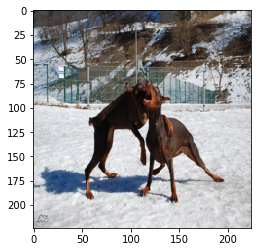

['two', '<SOS>', 'two', 'dogs', 'dogs', 'dog', 'the', 'a', 'the', '.', '<PAD>', '<PAD>', '<PAD>', '<EOS>', '<EOS>']
torch.Size([1, 3, 224, 224])


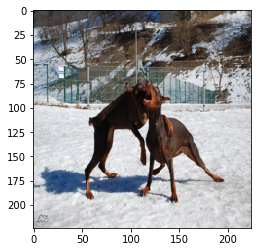

['two', 'two', 'two', 'dogs', 'are', 'a', 'a', 'the', '.', '.']
torch.Size([1, 3, 224, 224])


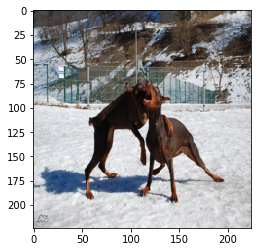

['hoe', 'a', 'a', 'dogs', 'are', 'on', 'a', 'the', '.', '<EOS>', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


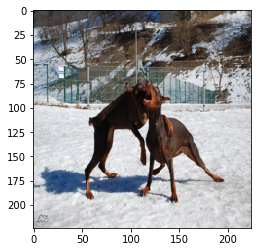

['hoe', '<SOS>', 'two', 'dog', 'brown', 'a', 'the', 'a', 'the', '.', '<PAD>']
torch.Size([1, 3, 224, 224])


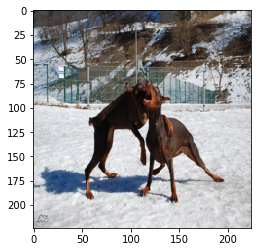

['two', 'two', 'a', 'dogs', 'dogs', 'dog', 'in', 'in', '.', '<EOS>']
torch.Size([1, 3, 224, 224])


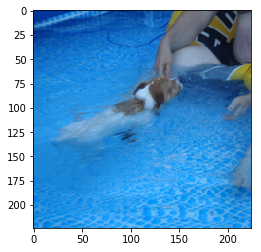

['<SOS>', 'a', 'the', 'dog', 'dog', 'in', 'in', 'a', 'the', 'a', '<EOS>', '<EOS>', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


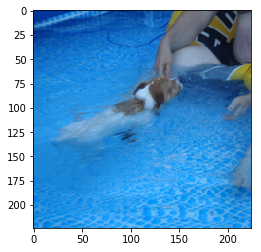

['<SOS>', 'a', 'a', 'black', 'and', 'white', 'in', 'a', 'the', 'a', '<PAD>', '<PAD>', '.', '<PAD>', '<EOS>', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


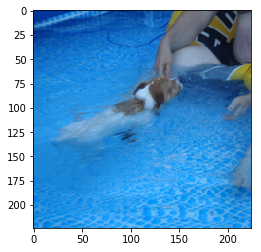

['<SOS>', 'a', 'a', 'dog', 'dog', 'a', 'a', 'in', '.', '<PAD>', 'a', '.', '.']
torch.Size([1, 3, 224, 224])


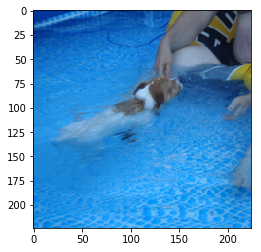

['<SOS>', 'two', 'a', 'dog', 'are', 'in', 'a', 'the', '.', 'a', '<EOS>', '.', '<EOS>', '.']
torch.Size([1, 3, 224, 224])


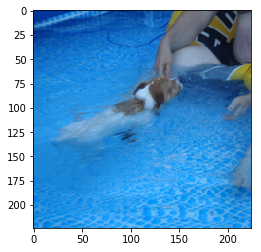

['two', 'a', 'two', 'black', 'are', 'dog', 'the', 'the', 'the', '.', '<PAD>', '<PAD>', '<EOS>', '<EOS>']
torch.Size([1, 3, 224, 224])


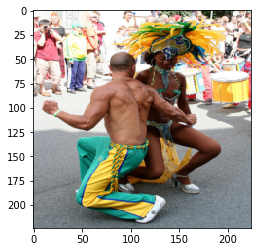

['<SOS>', '<SOS>', 'the', 'little', 'boy', 'a', 'a', 'a', 'in', '.', 'a', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


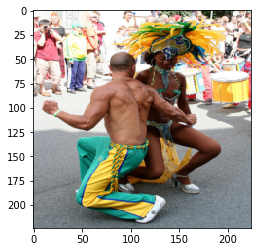

['carts', '<SOS>', 'the', 'boy', 'boy', 'a', 'in', 'and', 'a', 'and', 'a', '<EOS>', 'a', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


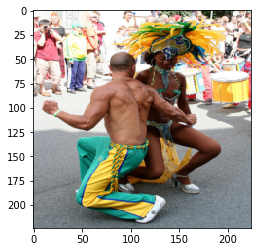

['patio', 'a', 'two', 'boy', 'in', 'a', 'in', 'a', 'and', '.', '<EOS>', '<EOS>', '<EOS>', '<PAD>', '.', '<PAD>', '<PAD>', '<PAD>', '<EOS>']
torch.Size([1, 3, 224, 224])


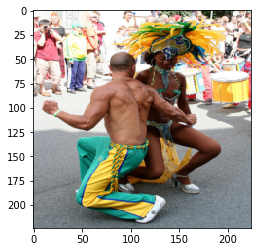

['patio', 'the', 'a', 'young', 'in', 'in', 'a', 'and', 'in', '.', 'a', 'a', '<EOS>', '.', '.', '<PAD>']
torch.Size([1, 3, 224, 224])


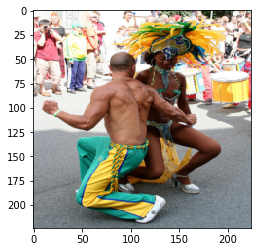

['carts', 'a', 'the', 'little', 'boy', 'with', 'the', 'and', 'in', 'a', '.', '<PAD>', '<EOS>', '<EOS>', '.', '.', '.', '.']
torch.Size([1, 3, 224, 224])


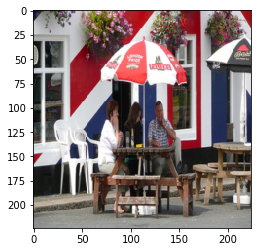

['<SOS>', 'the', 'man', 'people', 'is', 'a', 'on', 'on', 'on', '.', '<PAD>', 'a', '<EOS>', '<EOS>', '.', '.', '<PAD>', '.']
torch.Size([1, 3, 224, 224])


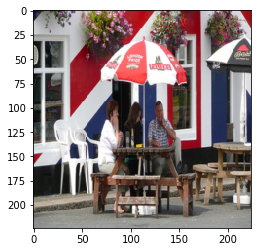

['patio', 'a', 'a', 'woman', 'of', 'in', 'a', 'a', 'a', 'a', '.', '.', 'a', '<PAD>', '<EOS>', '.']
torch.Size([1, 3, 224, 224])


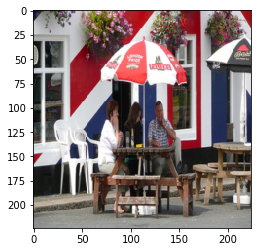

['a', '<SOS>', 'the', 'woman', 'in', 'a', 'and', 'and', 'on', '<PAD>', 'a']
torch.Size([1, 3, 224, 224])


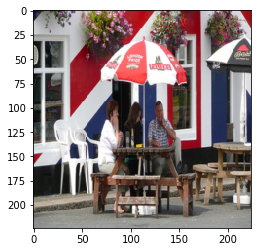

['a', '<SOS>', 'the', 'people', 'in', 'in', 'a', 'a', 'and', '.', 'a', '<PAD>', 'a', '<PAD>', '.', '.', '<EOS>', '<EOS>', '<PAD>', '<EOS>', '.']
torch.Size([1, 3, 224, 224])


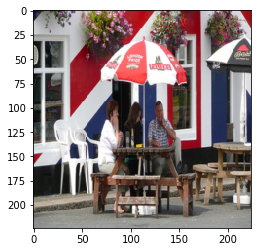

['<SOS>', 'the', 'two', 'people', 'of', 'in', 'a', 'and', 'a', '<PAD>', 'a', 'a', '<EOS>', '<PAD>', '<EOS>', '.', '.', '<PAD>', '.', '<PAD>']
torch.Size([1, 3, 224, 224])


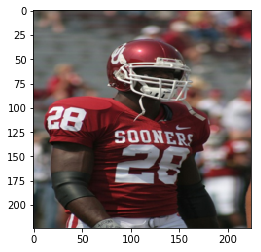

['heron', '<SOS>', 'a', 'basketball', 'player', 'in', 'player', 'the', 'the', '<EOS>', '.', '<PAD>', '.', '.', '.']
torch.Size([1, 3, 224, 224])


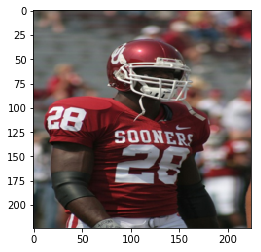

['<SOS>', 'a', 'a', 'player', 'basketball', 'player', 'basketball', 'the', 'basketball', 'the', 'basketball', '<EOS>', '.', '<PAD>']
torch.Size([1, 3, 224, 224])


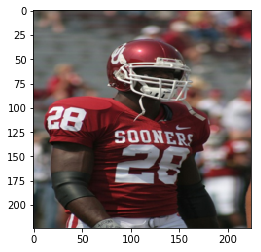

['turquoise', 'the', 'basketball', 'basketball', 'basketball', 'basketball', 'the', 'the', 'basketball', 'the', '<EOS>', '<PAD>', '<PAD>', '.', '.']
torch.Size([1, 3, 224, 224])


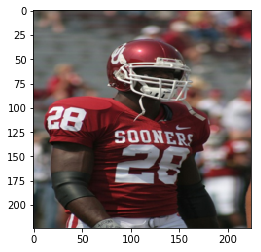

['<SOS>', '<SOS>', 'an', 'man', 'basketball', 'player', 'basketball', 'the', 'basketball', 'the']
torch.Size([1, 3, 224, 224])


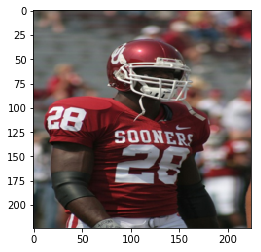

['heron', 'a', 'the', 'man', 'player', 'player', 'player', 'the', 'player', '<EOS>', 'basketball', '<PAD>', '.', '<PAD>']
torch.Size([1, 3, 224, 224])


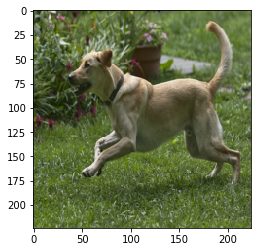

['two', 'a', 'two', 'brown', 'brown', 'is', 'a']
torch.Size([1, 3, 224, 224])


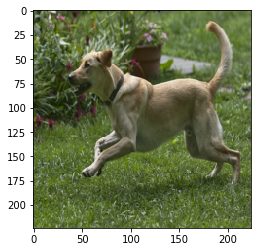

['a', '<SOS>', 'a', 'brown', 'brown', 'is', 'a', 'the', 'a', 'in']
torch.Size([1, 3, 224, 224])


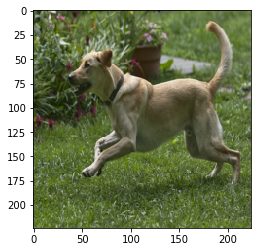

['<SOS>', '<SOS>', 'the', 'dog', 'brown', 'dog', 'dog', 'a', 'in', '<EOS>', '.', '.', '.', '.', '.', '.', '.', '<PAD>', '<PAD>', '.', '.', '.', '<EOS>']
torch.Size([1, 3, 224, 224])


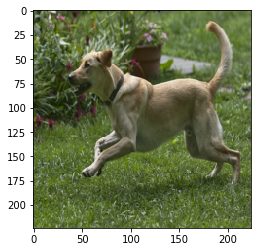

['two', 'a', 'a', 'dogs', 'dog', 'dog', 'dog', 'a', 'in', '<EOS>', '<EOS>', '<PAD>', '<PAD>', '<PAD>']
torch.Size([1, 3, 224, 224])


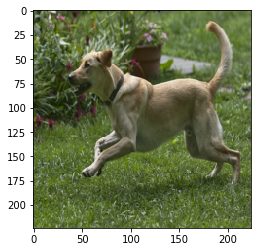

['<SOS>', '<SOS>', 'two', 'brown', 'dog', 'dog', 'in', 'the', 'a', 'a', 'a', '<EOS>', '<EOS>', '<EOS>', '<EOS>']
torch.Size([1, 3, 224, 224])


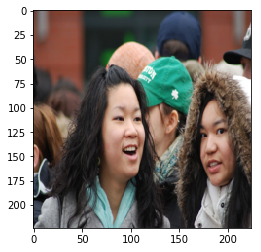

['<SOS>', 'two', 'a', 'woman', 'boy', 'in', 'and', 'a', '.', 'a', '.', '.', '.', '.', '<PAD>', '<EOS>', '<PAD>', '<PAD>', '<PAD>', '<EOS>', '<EOS>', '<PAD>', '<EOS>', '<PAD>', '<PAD>', '<EOS>', '.']
torch.Size([1, 3, 224, 224])


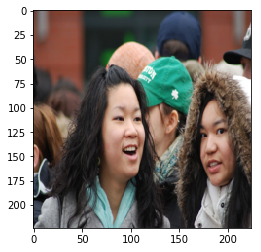

['<SOS>', '<SOS>', 'two', 'young', 'in', 'and', 'a', 'a', 'and', '.', '<PAD>', '.', '<EOS>', '.', '<EOS>', '<PAD>', '<EOS>', '<PAD>']
torch.Size([1, 3, 224, 224])


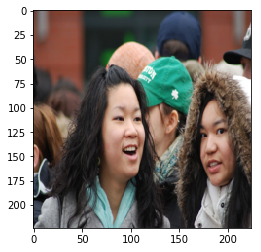

['<SOS>', 'two', 'a', 'young', 'in', 'in', 'in', 'a', 'a', '<PAD>']
torch.Size([1, 3, 224, 224])


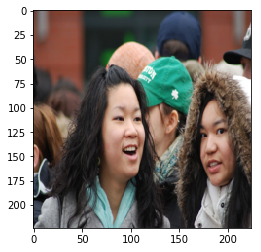

['carts', 'a', 'two', 'girls', 'and', 'a', 'in', 'a', '.', 'a', '<PAD>', '<EOS>']
torch.Size([1, 3, 224, 224])


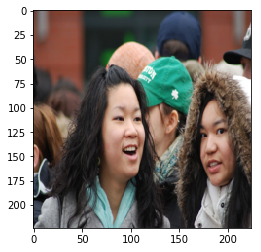

['carts', '<SOS>', 'the', 'young', 'in', 'wearing', 'and', 'in', '.', 'a', '.', '<EOS>', '<EOS>', '<EOS>', '<PAD>', '.', '.', '<PAD>', '<EOS>']
torch.Size([1, 3, 224, 224])


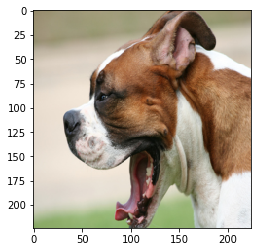

['<SOS>', 'a', 'a', 'man', 'in', 'is', 'in', 'the', 'a', 'a']
torch.Size([1, 3, 224, 224])


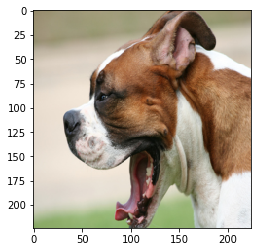

['a', 'two', 'the', 'man', 'and', 'a', 'in', 'a', 'a']
torch.Size([1, 3, 224, 224])


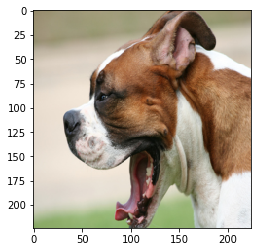

['d', 'a', 'two', 'man', 'dog', 'is', 'the', 'in', '.', 'a', '.', '<PAD>', '<PAD>', '<PAD>']
torch.Size([1, 3, 224, 224])


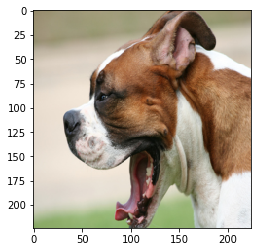

['a', 'a', 'two', 'dog', 'is']
torch.Size([1, 3, 224, 224])


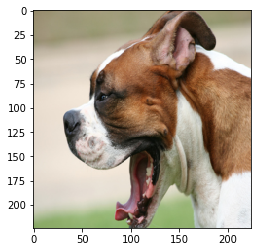

['<SOS>', '<SOS>', 'a', 'man', 'is', 'dog', 'in', 'a', 'a', '.', '<EOS>', '.', '<EOS>', '<EOS>']
torch.Size([1, 3, 224, 224])


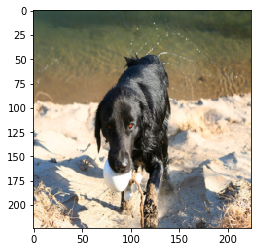

['black', 'the', 'the', 'black', 'is', 'is', 'the', 'water', 'in', '.', '.', '<PAD>', '<PAD>', '<EOS>', '<PAD>', '.', '<PAD>', '.', '<PAD>', '<PAD>', '<PAD>', '<EOS>']
torch.Size([1, 3, 224, 224])


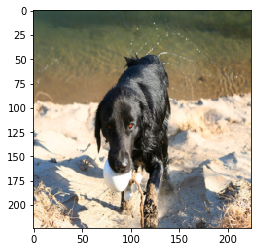

['a', 'the', 'the', 'black', 'is', 'a', 'the', 'in', 'water', '.', '<EOS>', '.', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '.', '<EOS>']
torch.Size([1, 3, 224, 224])


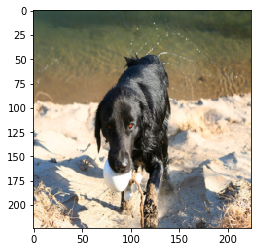

['a', '<SOS>', 'a', 'black', 'and', 'in', 'a', 'water', '.', 'water', '.', '.', '.', '.', '<EOS>', '<EOS>']
torch.Size([1, 3, 224, 224])


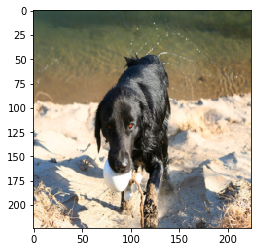

['<SOS>', 'a', 'a', 'dog', 'and', 'is', 'the', 'the', 'water', '<EOS>', '<EOS>', '.', '<EOS>', '<PAD>', '<EOS>', '<EOS>', '<PAD>', '.', '.']
torch.Size([1, 3, 224, 224])


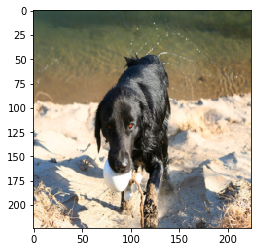

['<SOS>', 'the', 'a', 'large', 'dog', 'dog', 'the', 'water', 'water', '.', '<PAD>', '<PAD>', '<PAD>', '<EOS>', '<EOS>', '<PAD>', '.']
torch.Size([1, 3, 224, 224])


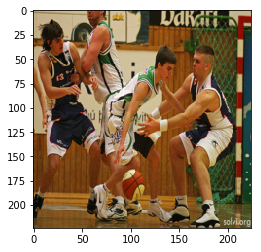

['<SOS>', '<SOS>', 'a', 'player', 'in', 'a', 'basketball', 'the', 'the', '<PAD>', '<EOS>', '<PAD>', '.', '.', '<PAD>', '.', '<EOS>', '.', '<PAD>', '<EOS>', '<EOS>', '<EOS>', '<PAD>', '<PAD>']
torch.Size([1, 3, 224, 224])


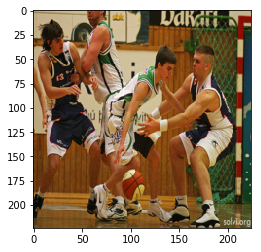

['<SOS>', '<SOS>', 'the', 'men', 'basketball', 'a', 'basketball', 'the', 'the']
torch.Size([1, 3, 224, 224])


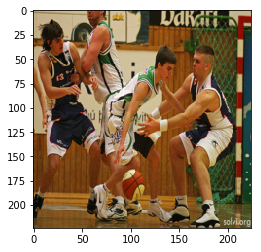

['sewer', 'a', 'an', 'player', 'basketball', 'basketball', 'the', 'a', '<EOS>', '<EOS>', '.', '.', '.']
torch.Size([1, 3, 224, 224])


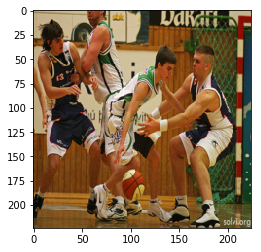

['sewer', '<SOS>', 'the', 'group', 'basketball', 'player', 'player', 'a', 'a', '<PAD>', '<EOS>', '.', '<EOS>', '.', '.', '<EOS>', '.', '<EOS>', '<PAD>', '<PAD>', '<PAD>']
torch.Size([1, 3, 224, 224])


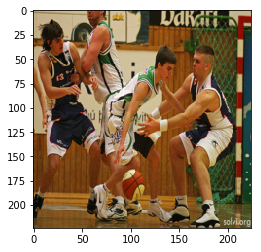

['turquoise', 'a', 'a', 'group', 'of', 'player', 'basketball', 'basketball', '.', 'the', '<EOS>']
torch.Size([1, 3, 224, 224])


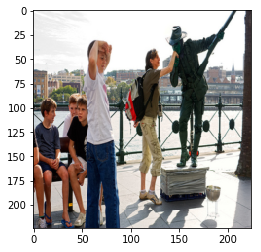

['patio', 'a', 'three', 'people', 'are', 'in', 'the', 'and', 'a', '.', 'a', '<EOS>', '.', '.', '.', '<PAD>', '.', '<EOS>', '<EOS>', '.', '<PAD>', '<EOS>']


In [156]:
encoder.eval()
decoder.eval()
with torch.no_grad():
    pbar = tqdm(total = len(test_dataloader),desc='Loss: -')
    for idx, (img, caption) in enumerate(test_dataloader):
        print(img.shape)
        plt.imshow(img.cpu().numpy()[0].transpose(1,2,0))
        plt.show()
        img = img.to(device)
        caption = caption.to(device) # seq_len x batch_size

        decoder.zero_grad()
        encoder.zero_grad()

        encode_out = encoder(img)
        try:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append([ test_dataset.vocab.stoi[a] for a in get_attr_encoded(encode_out[out_idx][None,:])])

            attrs = torch.tensor(x).to(device)
        except:
            x = []
            for out_idx in range(encode_out.shape[0]):
                x.append(' '.join(get_attr_encoded(encode_out[out_idx][None,:])))

            print(x)
            print(np.vectorize(lambda x: dataset.vocab.itos[x])(capts.cpu().numpy().squeeze()))
            raise ValueError
        hidden_logits, hidden_scores, input_scores, words = decoder(caption.shape[1], 
                                                             encode_out, attrs)
        print([ dataset.vocab.itos[x.item()] for x in words])
#         print(hidden_logits.shape,hidden_scores.shape,input_scores.shape)
#         print(caption.shape)
        loss = criterion(hidden_logits.transpose(1,2), caption, hidden_scores, input_scores)
#         loss.backward()

#         optimizer.step()

        pbar.update(1)
        pbar.set_description(f'Loss {loss.item():.2f}')
        if idx == 50:
            break

    pbar.refresh()

#         pass
        